# Photoplethysmography (PPG) signal to indicate a critically ill patient


Team:

Rikin Basu
Sai Raghavendra Vibhav Chimatapu

Course: DAAN 570 – Deep Learning (Spring I, 2023)

## Problem Statement

The objective of our project is to design a model for classification of photoplethysmography (PPG) signal to detect an elevated shock index which can indicate a critically ill patient.

Keywords: photoplethysmography, shock index ,Signal extraction, Deep Learning

## Data Collection


Source(url): https://pennstateoffice365-my.sharepoint.com/:f:/g/personal/yzb61_psu_edu/Eo4Q8j6bv0ZNk3i98SgIBRsB9fO9PHF7HwtbkHOoQPamag?e=10Sod7

Short Description : Database used for this project was the MIMIC-IV Waveform Database which is a large collection of physiological signals and measurements from patients in intensive care units, including electrocardiograms, photoplethysmograms, respiration, invasive and non-invasive blood pressure, and more.

Two types of data were collected by this project:

1. waveform data, which consists of a high-resolution, regularly sampled time series, collected directly from a measuring device;

2. numeric data, which consists of values that are either digitally derived (by software running on the bedside monitor, typically by analyzing one or more waveform signals), or sampled irregularly (such as non-invasive blood pressure).


Keywords: photoplethysmography, shock index ,Signal extraction

## Required packages

Below are a list of packages required :
1. sys
2. pathlib  Path
3. pandas 
4. wfdb
5. pprint
6. scipy.signal 
7. matplotlib  



# CODE:

In [1]:
import sys
from pathlib import Path
import pandas as pd

import wfdb

In [2]:
database_name = 'mimic4wdb/0.1.0'

# Create Empty Dataset with column names

In [3]:
df = pd.DataFrame(columns=['Heart_Rate', 'Systolic_blood_pressure(SBP)'])

# Identify the records in the database

In [4]:
# each subject may be associated with multiple records
subjects = wfdb.get_record_list(database_name)
print(f"The '{database_name}' database contains data from {len(subjects)} subjects")

# set max number of records to load
max_records_to_load = 200

The 'mimic4wdb/0.1.0' database contains data from 198 subjects


In [5]:
# iterate the subjects to get a list of records
records = []
for subject in subjects:
    studies = wfdb.get_record_list(f'{database_name}/{subject}')
    for study in studies:
        records.append(Path(f'{subject}{study}'))
        # stop if we've loaded enough records
        if len(records) >= max_records_to_load:
            print("Reached maximum required number of records.")
            break

print(f"Loaded {len(records)} records from the '{database_name}' database.")

Reached maximum required number of records.
Loaded 200 records from the 'mimic4wdb/0.1.0' database.


In [6]:
# format and print first five records
first_five_records = [str(x) for x in records[0:5]]
first_five_records = "\n - ".join(first_five_records)
print(f"First five records: \n - {first_five_records}")

print("""
Note the formatting of these records:
 - intermediate directory ('p100' in this case)
 - subject identifier (e.g. 'p10014354')
 - record identifier (e.g. '81739927'
 """)

First five records: 
 - waves\p100\p10014354\81739927\81739927
 - waves\p100\p10019003\87033314\87033314
 - waves\p100\p10020306\83404654\83404654
 - waves\p100\p10039708\83411188\83411188
 - waves\p100\p10039708\85583557\85583557

Note the formatting of these records:
 - intermediate directory ('p100' in this case)
 - subject identifier (e.g. 'p10014354')
 - record identifier (e.g. '81739927'
 


# Extract metadata for a record

In [7]:
# Specify the 4th record (note, in Python indexing begins at 0)
idx = 3
record = records[idx]
record_dir = f'{database_name}/{record.parent}'
print("PhysioNet directory specified for record: {}".format(record_dir))

PhysioNet directory specified for record: mimic4wdb/0.1.0/waves\p100\p10039708\83411188


In [8]:
record_name = record.name
print("Record name: {}".format(record_name))

Record name: 83411188


# Data Extraction

In [9]:
segment_names = ['83404654_0005']
segment_dirs = ['mimic4wdb/0.1.0/waves/p100/p10020306/83404654']

In [10]:
rel_segment_no = 0
rel_segment_name = segment_names[rel_segment_no]
rel_segment_dir = segment_dirs[rel_segment_no]
print(f"Specified segment '{rel_segment_name}' in directory: '{rel_segment_dir}'")

Specified segment '83404654_0005' in directory: 'mimic4wdb/0.1.0/waves/p100/p10020306/83404654'


In [11]:
segment_data = wfdb.rdrecord(record_name=rel_segment_name, pn_dir=rel_segment_dir) 
print(f"Data loaded from segment: {rel_segment_name}")

Data loaded from segment: 83404654_0005


In [12]:
print(f"Data stored in class of type: {type(segment_data)}")

Data stored in class of type: <class 'wfdb.io.record.Record'>


In [13]:
print(f"This segment contains waveform data for the following {segment_data.n_sig} signals: {segment_data.sig_name}")
print(f"The signals are sampled at a base rate of {segment_data.fs} Hz (and some are sampled at multiples of this)")
print(f"They last for {segment_data.sig_len/(60*segment_data.fs):.1f} minutes")

This segment contains waveform data for the following 6 signals: ['II', 'V', 'aVR', 'ABP', 'Pleth', 'Resp']
The signals are sampled at a base rate of 62.4725 Hz (and some are sampled at multiples of this)
They last for 52.4 minutes


In [14]:
from pprint import pprint
pprint(vars(segment_data))

{'adc_gain': [200.0, 200.0, 200.0, 16.0, 4096.0, 4093.0],
 'adc_res': [14, 14, 14, 13, 12, 12],
 'adc_zero': [8192, 8192, 8192, 4096, 2048, 2048],
 'base_counter': 10219520.0,
 'base_date': None,
 'base_time': None,
 'baseline': [8192, 8192, 8192, 800, 0, 2],
 'block_size': [0, 0, 0, 0, 0, 0],
 'byte_offset': [None, None, None, None, None, None],
 'checksum': [10167, 1300, 56956, 35887, 29987, 21750],
 'comments': ['signal 0 (II): channel=0 bandpass=[0.5,35]',
              'signal 1 (V): channel=1 bandpass=[0.5,35]',
              'signal 2 (aVR): channel=2 bandpass=[0.5,35]'],
 'counter_freq': 999.56,
 'd_signal': None,
 'e_d_signal': None,
 'e_p_signal': None,
 'file_name': ['83404654_0005e.dat',
               '83404654_0005e.dat',
               '83404654_0005e.dat',
               '83404654_0005p.dat',
               '83404654_0005p.dat',
               '83404654_0005r.dat'],
 'fmt': ['516', '516', '516', '516', '516', '516'],
 'fs': 62.4725,
 'init_value': [0, 0, 0, 0, 0, 0],
 '

In [15]:
from pprint import pprint
pprint(vars(segment_data))

{'adc_gain': [200.0, 200.0, 200.0, 16.0, 4096.0, 4093.0],
 'adc_res': [14, 14, 14, 13, 12, 12],
 'adc_zero': [8192, 8192, 8192, 4096, 2048, 2048],
 'base_counter': 10219520.0,
 'base_date': None,
 'base_time': None,
 'baseline': [8192, 8192, 8192, 800, 0, 2],
 'block_size': [0, 0, 0, 0, 0, 0],
 'byte_offset': [None, None, None, None, None, None],
 'checksum': [10167, 1300, 56956, 35887, 29987, 21750],
 'comments': ['signal 0 (II): channel=0 bandpass=[0.5,35]',
              'signal 1 (V): channel=1 bandpass=[0.5,35]',
              'signal 2 (aVR): channel=2 bandpass=[0.5,35]'],
 'counter_freq': 999.56,
 'd_signal': None,
 'e_d_signal': None,
 'e_p_signal': None,
 'file_name': ['83404654_0005e.dat',
               '83404654_0005e.dat',
               '83404654_0005e.dat',
               '83404654_0005p.dat',
               '83404654_0005p.dat',
               '83404654_0005r.dat'],
 'fmt': ['516', '516', '516', '516', '516', '516'],
 'fs': 62.4725,
 'init_value': [0, 0, 0, 0, 0, 0],
 '

# Data Visualisation

In [16]:
# time since the start of the segment at which to begin extracting data
start_seconds = 20
n_seconds_to_load = 60

In [17]:
segment_metadata = wfdb.rdheader(record_name=rel_segment_name,
                                 pn_dir=rel_segment_dir)

print(f"Metadata loaded from segment: {rel_segment_name}")
fs = round(segment_metadata.fs)

Metadata loaded from segment: 83404654_0005


In [18]:
sampfrom = fs * start_seconds
sampto = fs * (start_seconds + n_seconds_to_load)

segment_data = wfdb.rdrecord(record_name=rel_segment_name,
                             sampfrom=sampfrom,
                             sampto=sampto,
                             pn_dir=rel_segment_dir)

print(f"{n_seconds_to_load} seconds of data extracted from segment {rel_segment_name}")

60 seconds of data extracted from segment 83404654_0005


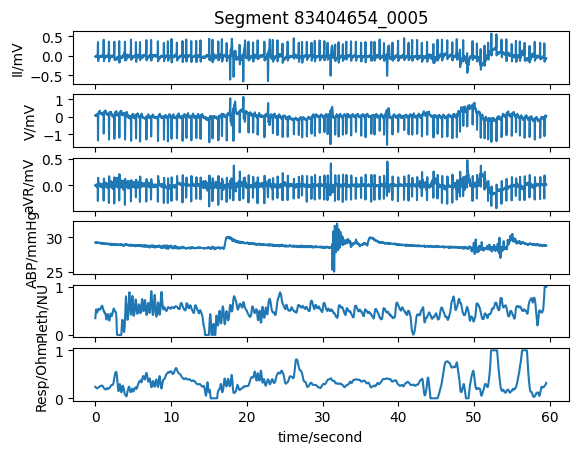

In [19]:
title_text = f"Segment {rel_segment_name}"
wfdb.plot_wfdb(record=segment_data,
               title=title_text,
               time_units='seconds') 

In [20]:
for sig_no in range(0, len(segment_data.sig_name)):
    if "Pleth" in segment_data.sig_name[sig_no]:
        break

ppg = segment_data.p_signal[:, sig_no]
fs = segment_data.fs
print(f"Extracted the PPG signal from column {sig_no} of the matrix of waveform data.")

Extracted the PPG signal from column 4 of the matrix of waveform data.


(50.0, 55.0)

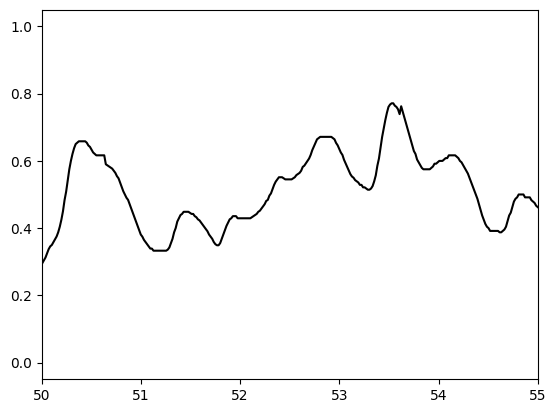

In [21]:
from matplotlib import pyplot as plt
import numpy as np

t = np.arange(0, (len(ppg) / fs), 1.0 / fs)
plt.plot(t, ppg, color = 'black', label='PPG')
plt.xlim([50, 55])

# Filtering Signals

We then filter the PPG signal:

1. Filtering is used to eliminate noise from physiological signals. For instance, ECG signals can contain mains frequency noise due to electrical interference.

2. We filter signals using the SciPy signal processing package to interpret the amplitude-response of a filter.


In [22]:
# Segment for analysis
segment_names = ['83404654_0005',
                 '82924339_0007']

segment_dirs = ['mimic4wdb/0.1.0/waves/p100/p10020306/83404654',
                'mimic4wdb/0.1.0/waves/p101/p10126957/82924339']

rel_segment_n = 0
rel_segment_name = segment_names[rel_segment_n]
rel_segment_dir = segment_dirs[rel_segment_n]

In [23]:
# time since the start of the segment at which to begin extracting data
start_seconds = 20 
n_seconds_to_load = 60

segment_metadata = wfdb.rdheader(record_name=rel_segment_name, pn_dir=rel_segment_dir) 
print(f"Metadata loaded from segment: {rel_segment_name}")

fs = round(segment_metadata.fs)
sampfrom = fs*start_seconds
sampto = fs*(start_seconds + n_seconds_to_load)

segment_data = wfdb.rdrecord(record_name=rel_segment_name,
                             sampfrom=sampfrom,
                             sampto=sampto,
                             pn_dir=rel_segment_dir)

print(f"{n_seconds_to_load} seconds of data extracted from: {rel_segment_name}")

for sig_no in range(0, len(segment_data.sig_name)):
    if "Pleth" in segment_data.sig_name[sig_no]:
        break

ppg = segment_data.p_signal[:,sig_no]
fs = segment_data.fs
print(f"Extracted the PPG signal from column {sig_no} of the matrix of waveform data.")

Metadata loaded from segment: 83404654_0005
60 seconds of data extracted from: 83404654_0005
Extracted the PPG signal from column 4 of the matrix of waveform data.


### Create a filter

In [24]:
import scipy.signal as sp

In [25]:
# Specify cutoff in Hertz
lpf_cutoff = 0.7 
hpf_cutoff = 10

In [26]:
sos_ppg = sp.butter(10,
                    [lpf_cutoff, hpf_cutoff],
                    btype = 'bp',
                    analog = False,
                    output = 'sos',
                    fs = segment_data.fs)

w, h = sp.sosfreqz(sos_ppg,
                   2000,
                   fs = fs)

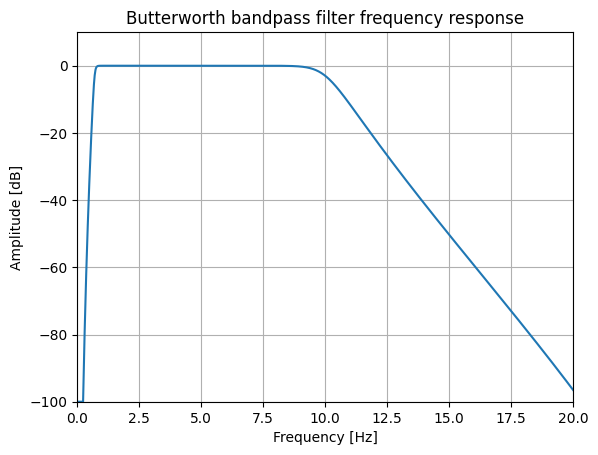

In [27]:
from matplotlib import pyplot as plt
import numpy as np

fig, ax = plt.subplots()

ax.plot(w, 20 * np.log10(np.maximum(abs(h), 1e-5)))

ax.set_title('Butterworth bandpass filter frequency response')
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('Amplitude [dB]')
ax.axis((0, 20, -100, 10))
ax.grid(which='both',
        axis='both')

# Filter the PPG signal

In [28]:
ppg_filt = sp.sosfiltfilt(sos_ppg, ppg)

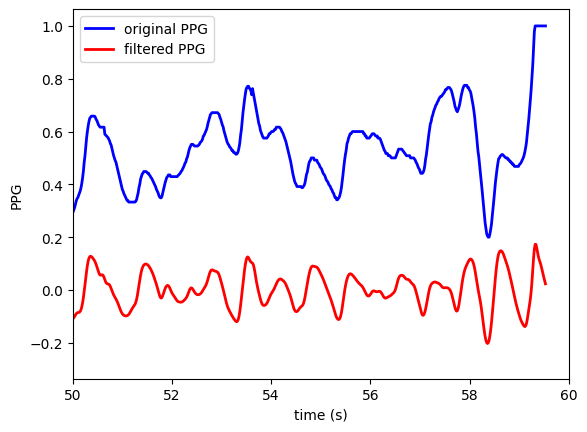

In [29]:
fig, ax = plt.subplots()
t = np.arange(0, len(ppg_filt))/segment_data.fs

ax.plot(t, ppg,
        linewidth=2.0,
        color = 'blue',
        label = "original PPG")

ax.plot(t, ppg_filt,
        linewidth=2.0,
        color = 'red',
        label = "filtered PPG")

ax.set(xlim=(0, n_seconds_to_load))
plt.xlabel('time (s)')
plt.ylabel('PPG')
plt.xlim([50, 60])

plt.legend()
plt.show()

# Differentiating the PPG signal

We then move onto differentiating the PPG signal:

1. Differentiating the PPG signal is a key step in identifying fiducial points on PPG pulse waves.

2. Apply SciPy functions for differentiating signals to view typical shapes of the first and second derivatives of PPG signals.

3. PPG waveform comes with four main fiducial points of onset (foot), systolic peak, dicrotic notch, and diastolic peak. This is shown in below Figure.


In [30]:
# Segment for analysis
segment_names = ['83404654_0005', '82924339_0007', '84248019_0005', '82439920_0004', '82800131_0002', '84304393_0001', '89464742_0001', '88958796_0004', '88995377_0001', '85230771_0004', '86643930_0004', '81250824_0005', '87706224_0003', '83058614_0005', '82803505_0017', '88574629_0001', '87867111_0012', '84560969_0001', '87562386_0001', '88685937_0001', '86120311_0001', '89866183_0014', '89068160_0002', '86380383_0001', '85078610_0008', '87702634_0007', '84686667_0002', '84802706_0002', '81811182_0004', '84421559_0005', '88221516_0007', '80057524_0005', '84209926_0018', '83959636_0010', '89989722_0016', '89225487_0007', '84391267_0001', '80889556_0002', '85250558_0011', '84567505_0005', '85814172_0007', '88884866_0005', '80497954_0012', '80666640_0014', '84939605_0004', '82141753_0018', '86874920_0014', '84505262_0010', '86288257_0001', '89699401_0001', '88537698_0013', '83958172_0001']
segment_dirs = ['mimic4wdb/0.1.0/waves/p100/p10020306/83404654', 'mimic4wdb/0.1.0/waves/p101/p10126957/82924339', 'mimic4wdb/0.1.0/waves/p102/p10209410/84248019', 'mimic4wdb/0.1.0/waves/p109/p10952189/82439920', 'mimic4wdb/0.1.0/waves/p111/p11109975/82800131', 'mimic4wdb/0.1.0/waves/p113/p11392990/84304393', 'mimic4wdb/0.1.0/waves/p121/p12168037/89464742', 'mimic4wdb/0.1.0/waves/p121/p12173569/88958796', 'mimic4wdb/0.1.0/waves/p121/p12188288/88995377', 'mimic4wdb/0.1.0/waves/p128/p12872596/85230771', 'mimic4wdb/0.1.0/waves/p129/p12933208/86643930', 'mimic4wdb/0.1.0/waves/p130/p13016481/81250824', 'mimic4wdb/0.1.0/waves/p132/p13240081/87706224', 'mimic4wdb/0.1.0/waves/p136/p13624686/83058614', 'mimic4wdb/0.1.0/waves/p137/p13791821/82803505', 'mimic4wdb/0.1.0/waves/p141/p14191565/88574629', 'mimic4wdb/0.1.0/waves/p142/p14285792/87867111', 'mimic4wdb/0.1.0/waves/p143/p14356077/84560969', 'mimic4wdb/0.1.0/waves/p143/p14363499/87562386', 'mimic4wdb/0.1.0/waves/p146/p14695840/88685937', 'mimic4wdb/0.1.0/waves/p149/p14931547/86120311', 'mimic4wdb/0.1.0/waves/p151/p15174162/89866183', 'mimic4wdb/0.1.0/waves/p153/p15312343/89068160', 'mimic4wdb/0.1.0/waves/p153/p15342703/86380383', 'mimic4wdb/0.1.0/waves/p155/p15552902/85078610', 'mimic4wdb/0.1.0/waves/p156/p15649186/87702634', 'mimic4wdb/0.1.0/waves/p158/p15857793/84686667', 'mimic4wdb/0.1.0/waves/p158/p15865327/84802706', 'mimic4wdb/0.1.0/waves/p158/p15896656/81811182', 'mimic4wdb/0.1.0/waves/p159/p15920699/84421559', 'mimic4wdb/0.1.0/waves/p160/p16034243/88221516', 'mimic4wdb/0.1.0/waves/p165/p16566444/80057524', 'mimic4wdb/0.1.0/waves/p166/p16644640/84209926', 'mimic4wdb/0.1.0/waves/p167/p16709726/83959636', 'mimic4wdb/0.1.0/waves/p167/p16715341/89989722', 'mimic4wdb/0.1.0/waves/p168/p16818396/89225487', 'mimic4wdb/0.1.0/waves/p170/p17032851/84391267', 'mimic4wdb/0.1.0/waves/p172/p17229504/80889556', 'mimic4wdb/0.1.0/waves/p173/p17301721/85250558', 'mimic4wdb/0.1.0/waves/p173/p17325001/84567505', 'mimic4wdb/0.1.0/waves/p174/p17490822/85814172', 'mimic4wdb/0.1.0/waves/p177/p17738824/88884866', 'mimic4wdb/0.1.0/waves/p177/p17744715/80497954', 'mimic4wdb/0.1.0/waves/p179/p17957832/80666640', 'mimic4wdb/0.1.0/waves/p180/p18080257/84939605', 'mimic4wdb/0.1.0/waves/p181/p18109577/82141753', 'mimic4wdb/0.1.0/waves/p183/p18324626/86874920', 'mimic4wdb/0.1.0/waves/p187/p18742074/84505262', 'mimic4wdb/0.1.0/waves/p188/p18824975/86288257', 'mimic4wdb/0.1.0/waves/p191/p19126489/89699401', 'mimic4wdb/0.1.0/waves/p193/p19313794/88537698', 'mimic4wdb/0.1.0/waves/p196/p19619764/83958172']

# Segment 3 and 8 are helpful
rel_segment_n = 8 
rel_segment_name = segment_names[rel_segment_n]
rel_segment_dir = segment_dirs[rel_segment_n]

In [31]:
# time since the start of the segment at which to begin extracting data
start_seconds = 100 
no_seconds_to_load = 5

segment_metadata = wfdb.rdheader(record_name=rel_segment_name,
                                 pn_dir=rel_segment_dir) 
print(f"Metadata loaded from segment: {rel_segment_name}")

fs = round(segment_metadata.fs)
sampfrom = fs*start_seconds
sampto = fs*(start_seconds + no_seconds_to_load)

segment_data = wfdb.rdrecord(record_name=rel_segment_name,
                             sampfrom=sampfrom,
                             sampto=sampto,
                             pn_dir=rel_segment_dir) 

print(f"{no_seconds_to_load} seconds of data extracted from: {rel_segment_name}")

for sig_no in range(0, len(segment_data.sig_name)):
    if "Pleth" in segment_data.sig_name[sig_no]:
        break

ppg = segment_data.p_signal[:,sig_no]
fs = segment_data.fs

print(f"Extracted the PPG signal from column {sig_no} of the matrix of waveform data.")

Metadata loaded from segment: 88995377_0001
5 seconds of data extracted from: 88995377_0001
Extracted the PPG signal from column 4 of the matrix of waveform data.


In [32]:
# package
import scipy.signal as sp

# filter cut-offs
lpf_cutoff = 0.7 # Hz
hpf_cutoff = 10 # Hz

# create filter
sos_ppg = sp.butter(10, [lpf_cutoff, hpf_cutoff],
                    btype = 'bp',
                    analog = False,
                    output = 'sos',
                    fs = segment_data.fs)

w, h = sp.sosfreqz(sos_ppg, 2000, fs = fs)

# filter PPG
ppg_filt = sp.sosfiltfilt(sos_ppg, ppg)

In [33]:
from matplotlib import pyplot as plt
import numpy as np

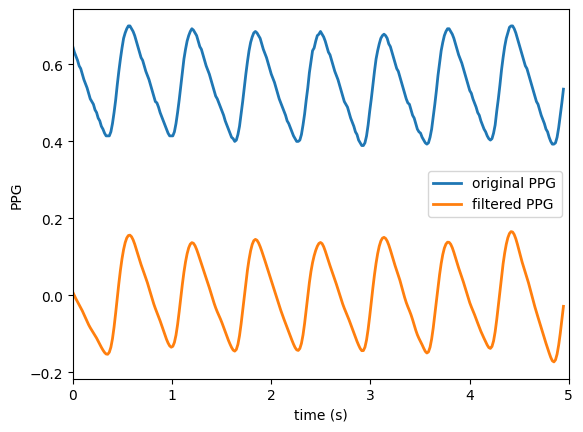

In [34]:
fig, ax = plt.subplots()
t = np.arange(0, len(ppg_filt)) / segment_data.fs

ax.plot(t, ppg,
        linewidth=2.0,
        label = "original PPG")

ax.plot(t, ppg_filt,
        linewidth=2.0,
        label = "filtered PPG")

ax.set(xlim=(0, no_seconds_to_load))
plt.xlabel('time (s)')
plt.ylabel('PPG')

plt.legend()
plt.show()

In [35]:
# Calculate first derivative
d1ppg = sp.savgol_filter(ppg_filt, 9, 5, deriv=1)

# Calculate second derivative
d2ppg = sp.savgol_filter(ppg_filt, 9, 5, deriv=2) 

### Plot the PPG and its derivatives

In [36]:
from matplotlib import pyplot as plt
import numpy as np

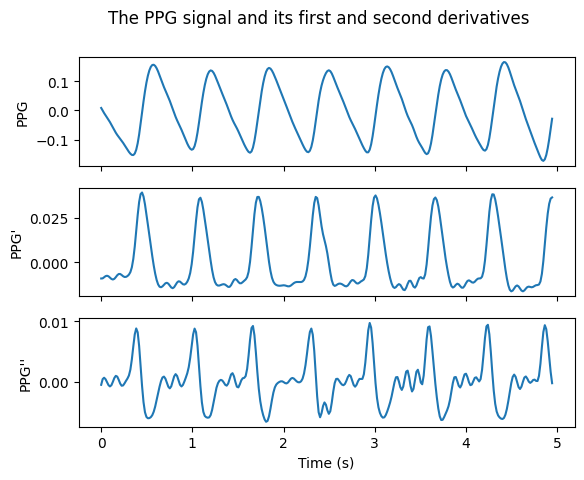

In [37]:
t = np.arange(0, len(ppg_filt))/segment_data.fs

fig, (ax1,ax2,ax3) = plt.subplots(3, 1, sharex = True, sharey = False)
ax1.plot(t, ppg_filt)
ax1.set(xlabel = '', ylabel = 'PPG')

plt.suptitle('The PPG signal and its first and second derivatives')

ax2.plot(t, d1ppg)
ax2.set(xlabel = '',
        ylabel = 'PPG\'')

ax3.plot(t, d2ppg)
ax3.set(xlabel = 'Time (s)',
        ylabel = 'PPG\'\'')

plt.show()

# Heart Beat Functions

We now proceed with beat detection:

1. A key step in analysing PPG signals is the detection of beats in the signals. This allows individual pulse waves to be analysed.

2. Call Python functions that are stored in a separate file and use beat detection algorithm to detect beats in PPG signals.


In [38]:
import scipy.signal as sp
import numpy as np

def pulse_detect(x,fs,w,alg):
    """
    Description: Pulse detection and correction from pulsatile signals
    Inputs:  x, array with pulsatile signal [user defined units]
             fs, sampling rate of signal [Hz]
             w, window length for analysis [s]
             alg, string with the name of the algorithm to apply ['heartpy','d2max','upslopes','delineator']
    Outputs: ibis, location of cardiac cycles as detected by the selected algorithm [number of samples]

    Algorithms:       1: HeartPy (van Gent et al, 2019, DOI: 10.1016/j.trf.2019.09.015)
                      2: 2nd derivative maxima (Elgendi et al, 2013, DOI: 10.1371/journal.pone.0076585)
                      3: Systolic upslopes (Arguello Prada and Serna Maldonado, 2018,
                         DOI: 10.1080/03091902.2019.1572237)
                      4: Delineator (Li et al, 2010, DOI: 10.1109/TBME.2005.855725)
    Fiducial points:  1: Systolic peak (pks)
                      2: Onset, as the minimum before the systolic peak (ons)
                      3: Onset, using the tangent intersection method (ti)
                      4: Diastolic peak (dpk)
                      5: Maximum slope (m1d)
                      6: a point from second derivative PPG (a2d)
                      7: b point from second derivative PPG (b2d)
                      8: c point from second derivative PPG (c2d)
                      9: d point from second derivative PPG (d2d)
                      10: e point from second derivative PPG (e2d)
                      11: p1 from the third derivative PPG (p1)
                      12: p2 from the third derivative PPG (p2)

    Libraries: NumPy (as np), SciPy (Signal, as sp), Matplotlib (PyPlot, as plt)

    Version: 1.0 - June 2022

    Developed by: Elisa Mejía-Mejía
                   City, University of London

    """

    # Check selected algorithm
    pos_alg = ['heartpy','d2max','upslopes','delineator']
    if not(alg in pos_alg):
        print('Unknown algorithm determined. Using D2max as default')
        alg = 'd2max'

    # Pre-processing of signal
    x_d = sp.detrend(x)
    sos = sp.butter(10, [0.5, 10], btype = 'bp', analog = False, output = 'sos', fs = fs)
    x_f = sp.sosfiltfilt(sos, x_d)

    # Peak detection in windows of length w
    n_int = np.floor(len(x_f)/(w*fs))
    for i in range(int(n_int)):
        start = i*fs*w
        stop = (i + 1)*fs*w - 1
        # print('Start: ' + str(start) + ', stop: ' + str(stop) + ', fs: ' + str(fs))
        aux = x_f[range(start,stop)]
        if alg == 'heartpy':
            locs = heartpy(aux,fs,40,180,5)
        elif alg == 'd2max':
            locs = d2max(aux,fs)
        elif alg == 'upslopes':
            locs = upslopes(aux)
        elif alg == 'delineator':
            locs = delineator(aux,fs)
        locs = locs + start
        if i == 0:
            ibis = locs
        else:
            ibis = np.append(ibis,locs)
    if n_int*fs*w != len(x_f):
        start = stop + 1
        stop = len(x_f)
        aux = x_f[range(start,stop)]
        if len(aux) > 20:
            if alg == 'heartpy':
                locs = heartpy(aux,fs,40,180,5)
            elif alg == 'd2max':
                locs = d2max(aux,fs)
            elif alg == 'upslopes':
                locs = upslopes(aux)
            elif alg == 'delineator':
                locs = delineator(aux,fs)
            locs = locs + start
            ibis = np.append(ibis,locs)
    ind, = np.where(ibis <= len(x_f))
    ibis = ibis[ind]

    ibis = peak_correction(x,ibis,fs,20,5,[0.5, 1.5])

    #fig = plt.figure()
    #plt.plot(x)
    #plt.plot(x_d)
    #plt.plot(x_f)
    #plt.scatter(ibis,x_f[ibis],marker = 'o',color = 'red')
    #plt.scatter(ibis,x[ibis],marker = 'o',color = 'red')

    return ibis

def peak_correction(x,locs,fs,t,stride,th_len):
    """
    Correction of peaks detected from pulsatile signals

    Inputs:   x, pulsatile signal [user defined units]
              locs, location of the detected interbeat intervals [number of samples]
              fs, sampling rate [Hz]
              t, duration of intervals for the correction [s]
              stride, stride between consecutive intervals for the correction [s]
              th_len, array with the percentage of lower and higher thresholds for comparing the duration of IBIs
              [proportions]
    Outputs:  ibis, array with the corrected points related to the start of the inter-beat intervals [number of samples]

    Developed by:  Elisa Mejía Mejía
                   City, University of London
    Version:       1.0 -   June, 2022

    """

    #fig = plt.figure()
    #plt.plot(x)
    #plt.scatter(locs,x[locs],marker = 'o',color = 'red', label = 'Original')
    #plt.title('Peak correction')

    # Correction of long and short IBIs
    len_window = np.round(t*fs)
    #print('Window length: ' + str(len_window))
    first_i = 0
    second_i = len_window - 1
    while second_i < len(x):
        ind1, = np.where(locs >= first_i)
        ind2, = np.where(locs <= second_i)
        ind = np.intersect1d(ind1, ind2)

        win = locs[ind]
        dif = np.diff(win)
        #print('Indices: ' + str(ind) + ', locs: ' + str(locs[ind]) + ', dif: ' + str(dif))

        th_dif = np.zeros(2)
        th_dif[0] = th_len[0]*np.median(dif)
        th_dif[1] = th_len[1]*np.median(dif)

        th_amp = np.zeros(2)
        th_amp[0] = 0.75*np.median(x[win])
        th_amp[1] = 1.25*np.median(x[win])
        #print('Length thresholds: ' + str(th_dif) + ', amplitude thresholds: ' + str(th_amp))

        j = 0
        while j < len(dif):
            if dif[j] <= th_dif[0]:
                if j == 0:
                    opt = np.append(win[j], win[j + 1])
                else:
                    opt = np.append(win[j], win[j + 1]) - win[j - 1]
                print('Optional: ' + str(opt))
                dif_abs = np.abs(opt - np.median(dif))
                min_val = np.min(dif_abs)
                ind_min, = np.where(dif_abs == min_val)
                print('Minimum: ' + str(min_val) + ', index: ' + str(ind_min))
                if ind_min == 0:
                    print('Original window: ' + str(win), end = '')
                    win = np.delete(win, win[j + 1])
                    print(', modified window: ' + str(win))
                else:
                    print('Original window: ' + str(win), end = '')
                    win = np.delete(win, win[j])
                    print(', modified window: ' + str(win))
                dif = np.diff(win)
            elif dif[j] >= th_dif[1]:
                aux_x = x[win[j]:win[j + 1]]
                locs_pks, _ = sp.find_peaks(aux_x)
                #fig = plt.figure()
                #plt.plot(aux_x)
                #plt.scatter(locs_pks,aux_x[locs_pks],marker = 'o',color = 'red')

                locs_pks = locs_pks + win[j]
                ind1, = np.where(x[locs_pks] >= th_amp[0])
                ind2, = np.where(x[locs_pks] <= th_amp[1])
                ind = np.intersect1d(ind1, ind2)
                locs_pks = locs_pks[ind]
                #print('Locations: ' + str(locs_pks))

                if len(locs_pks) != 0:
                    opt = locs_pks - win[j]

                    dif_abs = np.abs(opt - np.median(dif))
                    min_val = np.min(dif_abs)
                    ind_min, = np.where(dif_abs == min_val)

                    win = np.append(win, locs_pks[ind_min])
                    win = np.sort(win)
                    dif = np.diff(win)
                    j = j + 1
                else:
                    opt = np.round(win[j] + np.median(dif))
                    if opt < win[j + 1]:
                        win = np.append(win, locs_pks[ind_min])
                        win = np.sort(win)
                        dif = np.diff(win)
                        j = j + 1
                    else:
                        j = j + 1
            else:
                j = j + 1

        locs = np.append(win, locs)
        locs = np.sort(locs)

        first_i = first_i + stride*fs - 1
        second_i = second_i + stride*fs - 1

    dif = np.diff(locs)
    dif = np.append(0, dif)
    ind, = np.where(dif != 0)
    locs = locs[ind]

    #plt.scatter(locs,x[locs],marker = 'o',color = 'green', label = 'After length correction')

    # Correction of points that are not peaks
    i = 0
    pre_loc = 0
    while i < len(locs):
        if locs[i] == 0:
            locs = np.delete(locs, locs[i])
        elif locs[i] == len(x):
            locs = np.delete(locs, locs[i])
        else:
            #print('Previous: ' + str(x[locs[i] - 1]) + ', actual: ' + str(x[locs[i]]) + ', next: ' + str(x[locs[i] + 1]))
            cond = (x[locs[i]] >= x[locs[i] - 1]) and (x[locs[i]] >= x[locs[i] + 1])
            #print('Condition: ' + str(cond))
            if cond:
                i = i + 1
            else:
                if locs[i] == pre_loc:
                    i = i + 1
                else:
                    if i == 0:
                        aux = x[0:locs[i + 1] - 1]
                        aux_loc = locs[i] - 1
                        aux_start = 0
                    elif i == len(locs) - 1:
                        aux = x[locs[i - 1]:len(x) - 1]
                        aux_loc = locs[i] - locs[i - 1]
                        aux_start = locs[i - 1]
                    else:
                        aux = x[locs[i - 1]:locs[i + 1]]
                        aux_loc = locs[i] - locs[i - 1]
                        aux_start = locs[i - 1]
                    #print('i ' + str(i) + ' out of ' + str(len(locs)) + ', aux length: ' + str(len(aux)) +
                    #      ', location: ' + str(aux_loc))
                    #print('Locs i - 1: ' + str(locs[i - 1]) + ', locs i: ' + str(locs[i]) + ', locs i + 1: ' + str(locs[i + 1]))

                    pre = find_closest_peak(aux, aux_loc, 'backward')
                    pos = find_closest_peak(aux, aux_loc, 'forward')
                    #print('Previous: ' + str(pre) + ', next: ' + str(pos) + ', actual: ' + str(aux_loc))

                    ibi_pre = np.append(pre - 1, len(aux) - pre)
                    ibi_pos = np.append(pos - 1, len(aux) - pos)
                    ibi_act = np.append(aux_loc - 1, len(aux) - aux_loc)
                    #print('Previous IBIs: ' + str(ibi_pre) + ', next IBIs: ' + str(ibi_pos) +
                    #      ', actual IBIs: ' + str(ibi_act))

                    dif_pre = np.abs(ibi_pre - np.mean(np.diff(locs)))
                    dif_pos = np.abs(ibi_pos - np.mean(np.diff(locs)))
                    dif_act = np.abs(ibi_act - np.mean(np.diff(locs)))
                    #print('Previous DIF: ' + str(dif_pre) + ', next DIF: ' + str(dif_pos) +
                    #      ', actual DIF: ' + str(dif_act))

                    avgs = [np.mean(dif_pre), np.mean(dif_pos), np.mean(dif_act)]
                    min_avg = np.min(avgs)
                    ind, = np.where(min_avg == avgs)
                    #print('Averages: ' + str(avgs) + ', min index: ' + str(ind))
                    if len(ind) != 0:
                        ind = ind[0]

                    if ind == 0:
                        locs[i] = pre + aux_start - 1
                    elif ind == 1:
                        locs[i] = pos + aux_start - 1
                    elif ind == 2:
                        locs[i] = aux_loc + aux_start - 1
                    i = i + 1

    #plt.scatter(locs,x[locs],marker = 'o',color = 'yellow', label = 'After not-peak correction')

    # Correction of peaks according to amplitude
    len_window = np.round(t*fs)
    #print('Window length: ' + str(len_window))
    keep = np.empty(0)
    first_i = 0
    second_i = len_window - 1
    while second_i < len(x):
        ind1, = np.where(locs >= first_i)
        ind2, = np.where(locs <= second_i)
        ind = np.intersect1d(ind1, ind2)
        win = locs[ind]
        if np.median(x[win]) > 0:
            th_amp_low = 0.5*np.median(x[win])
            th_amp_high = 3*np.median(x[win])
        else:
            th_amp_low = -3*np.median(x[win])
            th_amp_high = 1.5*np.median(x[win])
        ind1, = np.where(x[win] >= th_amp_low)
        ind2, = np.where(x[win] <= th_amp_high)
        aux_keep = np.intersect1d(ind1,ind2)
        keep = np.append(keep, aux_keep)

        first_i = second_i + 1
        second_i = second_i + stride*fs - 1

    if len(keep) != 0:
        keep = np.unique(keep)
        locs = locs[keep.astype(int)]

    #plt.scatter(locs,x[locs],marker = 'o',color = 'purple', label = 'After amplitude correction')
    #plt.legend()

    return locs

def find_closest_peak(x, loc, dir_search):
    """
    Finds the closest peak to the initial location in x

    Inputs:   x, signal of interest [user defined units]
              loc, initial location [number of samples]
              dir_search, direction of search ['backward','forward']
    Outputs:  pos, location of the first peak detected in specified direction [number of samples]

    Developed by:  Elisa Mejía Mejía
                   City, University of London
    Version:       1.0 -   June, 2022

    """

    pos = -1
    if dir_search == 'backward':
        i = loc - 2
        while i > 0:
            if (x[i] > x[i - 1]) and (x[i] > x[i + 1]):
                pos = i
                i = 0
            else:
                i = i - 1
        if pos == -1:
            pos = loc
    elif dir_search == 'forward':
        i = loc + 1
        while i < len(x) - 1:
            if (x[i] > x[i - 1]) and (x[i] > x[i + 1]):
                pos = i
                i = len(x)
            else:
                i = i + 1
        if pos == -1:
            pos = loc

    return pos

def seek_local(x, start, end):
    val_min = x[start]
    val_max = x[start]

    ind_min = start
    ind_max = start

    for j in range(start, end):
        if x[j] > val_max:
            val_max = x[j]
            ind_max = j
        elif x[j] < val_min:
            val_min = x[j]
            ind_min = j

    return val_min, ind_min, val_max, ind_max

def heartpy(x, fs, min_ihr, max_ihr, w):
    """
    Detects inter-beat intervals using HeartPy
    Citation: van Gent P, Farah H, van Nes N, van Arem B (2019) Heartpy: A novel heart rate algorithm
              for the analysis of noisy signals. Transp Res Part F, vol. 66, pp. 368-378. DOI: 10.1016/j.trf.2019.09.015

    Inputs:   x, pulsatile signal [user defined units]
              fs, sampling rate [Hz]
              min_ihr, minimum value of instantaneous heart rate to be accepted [bpm]
              max_ihr, maximum value of instantaneous heart rate to be accepted [bpm]
              w, length of segments for correction of peaks [s]
    Outputs:  ibis, position of the starting points of inter-beat intervals [number of samples]

    Developed by:  Elisa Mejía Mejía
                   City, University of London
    Version:       1.0 -   June, 2022

    """

    # Identification of peaks
    is_roi = 0
    n_rois = 0
    pos_pks = np.empty(0).astype(int)
    locs = np.empty(0).astype(int)

    len_ma = int(np.round(0.75*fs))
    #print(len_ma)
    sig = np.append(x[0]*np.ones(len_ma), x)
    sig = np.append(sig, x[-1]*np.ones(len_ma))

    i = len_ma
    while i < len(sig) - len_ma:
        ma = np.mean(sig[i - len_ma:i + len_ma - 1])
        #print(len(sig[i - len_ma:i + len_ma - 1]),ma)

        # If it is the beginning of a new ROI:
        if is_roi == 0 and sig[i] >= ma:
            is_roi = 1
            n_rois = n_rois + 1
            #print('New ROI ---' + str(n_rois) + ' @ ' + str(i))
            # If it is a peak:
            if sig[i] >= sig[i - 1] and sig[i] >= sig[i + 1]:
                pos_pks = np.append(pos_pks, int(i))
                #print('Possible peaks: ' + str(pos_pks))

        # If it is part of a ROI which is not over:
        elif is_roi == 1 and sig[i] > ma:
            #print('Actual ROI ---' + str(n_rois) + ' @ ' + str(i))
            # If it is a peak:
            if sig[i] >= sig[i - 1] and sig[i] >= sig[i + 1]:
                pos_pks = np.append(pos_pks, int(i))
                #print('Possible peaks: ' + str(pos_pks))

        # If the ROI is over or the end of the signal has been reached:
        elif is_roi == 1 and (sig[i] < ma or i == (len(sig) - len_ma)):
            #print('End of ROI ---' + str(n_rois) + ' @ ' + str(i) + '. Pos pks: ' + str(pos_pks))
            is_roi = 0 # Lowers flag

            # If it is the end of the first ROI:
            if n_rois == 1:
                # If at least one peak has been found:
                if len(pos_pks) != 0:
                    # Determines the location of the maximum peak:
                    max_pk = np.max(sig[pos_pks])
                    ind, = np.where(max_pk == np.max(sig[pos_pks]))
                    #print('First ROI: (1) Max Peak: ' + str(max_pk) + ', amplitudes: ' + str(sig[pos_pks]) +
                    #      ', index: ' + str(int(ind)), ', pk_ind: ' + str(pos_pks[ind]))
                    # The maximum peak is added to the list:
                    locs = np.append(locs, pos_pks[ind])
                    #print('Locations: ' + str(locs))
                # If no peak was found:
                else:
                    # Counter for ROIs is reset to previous value:
                    n_rois = n_rois - 1

            # If it is the end of the second ROI:
            elif n_rois == 2:
                # If at least one peak has been found:
                if len(pos_pks) != 0:
                    # Measures instantantaneous HR of found peaks with respect to the previous peak:
                    ihr = 60/((pos_pks - locs[-1])/fs)
                    good_ihr, = np.where(ihr <= max_ihr and ihr >= min_ihr)
                    #print('Second ROI IHR check: (1) IHR: ' + str(ihr) + ', valid peaks: ' + str(good_ihr) +
                    #      ', pos_pks before: ' + str(pos_pks) + ', pos_pks after: ' + str(pos_pks[good_ihr]))
                    pos_pks = pos_pks[good_ihr].astype(int)

                    # If at least one peak is between HR limits:
                    if len(pos_pks) != 0:
                        # Determines the location of the maximum peak:
                        max_pk = np.max(sig[pos_pks])
                        ind, = np.where(max_pk == np.max(sig[pos_pks]))
                        #print('Second ROI: (1) Max Peak: ' + str(max_pk) + ', amplitudes: ' + str(sig[pos_pks]) +
                        #  ', index: ' + str(int(ind)), ', pk_ind: ' + str(pos_pks[ind]))
                        # The maximum peak is added to the list:
                        locs = np.append(locs, pos_pks[ind])
                        #print('Locations: ' + str(locs))
                # If no peak was found:
                else:
                    # Counter for ROIs is reset to previous value:
                    n_rois = n_rois - 1

            # If it is the end of the any further ROI:
            else:
                # If at least one peak has been found:
                if len(pos_pks) != 0:
                    # Measures instantantaneous HR of found peaks with respect to the previous peak:
                    ihr = 60/((pos_pks - locs[-1])/fs)
                    good_ihr, = np.where(ihr <= max_ihr and ihr >= min_ihr)
                    #print('Third ROI IHR check: (1) IHR: ' + str(ihr) + ', valid peaks: ' + str(good_ihr) +
                    #      ', pos_pks before: ' + str(pos_pks) + ', pos_pks after: ' + str(pos_pks[good_ihr]))
                    pos_pks = pos_pks[good_ihr].astype(int)

                    # If at least one peak is between HR limits:
                    if len(pos_pks) != 0:
                        # Calculates SDNN with the possible peaks on the ROI:
                        sdnn = np.zeros(len(pos_pks))
                        for j in range(len(pos_pks)):
                            sdnn[j] = np.std(np.append(locs/fs, pos_pks[j]/fs))
                        # Determines the new peak as that one with the lowest SDNN:
                        min_pk = np.min(sdnn)
                        ind, = np.where(min_pk == np.min(sdnn))
                        #print('Third ROI: (1) Min SDNN Peak: ' + str(min_pk) + ', amplitudes: ' + str(sig[pos_pks]) +
                        #  ', index: ' + str(int(ind)), ', pk_ind: ' + str(pos_pks[ind]))
                        locs = np.append(locs, pos_pks[ind])
                        #print('Locations: ' + str(locs))
                # If no peak was found:
                else:
                    # Counter for ROIs is reset to previous value:
                    n_rois = n_rois - 1

            # Resets possible peaks for next ROI:
            pos_pks = np.empty(0)

        i = i + 1;

    locs = locs - len_ma

    # Correction of peaks
    c_locs = np.empty(0)
    n_int = np.floor(len(x)/(w*fs))
    for i in range(int(n_int)):
        ind1, = np.where(locs >= i*w*fs)
        #print('Locs >= ' + str((i)*w*fs) + ': ' + str(locs[ind1]))
        ind2, = np.where(locs < (i + 1)*w*fs)
        #print('Locs < ' + str((i + 1)*w*fs) + ': ' + str(locs[ind2]))
        ind = np.intersect1d(ind1, ind2)
        #print('Larger and lower than locs: ' + str(locs[ind]))
        int_locs = locs[ind]

        if i == 0:
            aux_ibis = np.diff(int_locs)
        else:
            ind, = np.where(locs >= i*w*fs)
            last = locs[ind[0] - 1]
            aux_ibis = np.diff(np.append(last, int_locs))
        avg_ibis = np.mean(aux_ibis)
        th = np.append((avg_ibis - 0.3*avg_ibis), (avg_ibis + 0.3*avg_ibis))
        ind1, = np.where(aux_ibis > th[0])
        #print('Ind1: ' + str(ind1))
        ind2, = np.where(aux_ibis < th[1])
        #print('Ind2: ' + str(ind2))
        ind = np.intersect1d(ind1, ind2)
        #print('Ind: ' + str(ind))

        c_locs = np.append(c_locs, int_locs[ind]).astype(int)
        print(c_locs)

    #fig = plt.figure()
    #plt.plot(x)
    #plt.plot(sig)
    #plt.scatter(locs,x[locs],marker = 'o',color = 'red')
    #if len(c_locs) != 0:
        #plt.scatter(c_locs,x[c_locs],marker = 'o',color = 'blue')

    if len(c_locs) != 0:
        ibis = c_locs
    else:
        ibis = locs

    return ibis

def d2max(x, fs):
    """
    Detects inter-beat intervals using D2Max
    Citation: Elgendi M, Norton I, Brearley M, Abbott D, Schuurmans D (2013) Systolic Peak Detection in Acceleration
              Photoplethysmograms Measured from Emergency Responders in Tropical Conditions. PLoS ONE, vol. 8, no. 10,
              pp. e76585. DOI: 10.1371/journal.pone.0076585

    Inputs:   x, pulsatile signal [user defined units]
              fs, sampling rate [Hz]
    Outputs:  ibis, position of the starting points of inter-beat intervals [number of samples]

    Developed by:  Elisa Mejía Mejía
                   City, University of London
    Version:       1.0 -   June, 2022

    """

    # Bandpass filter
    if len(x) < 4098:
        z_fill = np.zeros(4098 - len(x) + 1)
        x_z = np.append(x, z_fill)
    sos = sp.butter(10, [0.5, 8], btype = 'bp', analog = False, output = 'sos', fs = fs)
    x_f = sp.sosfiltfilt(sos, x_z)

    # Signal clipping
    ind, = np.where(x_f < 0)
    x_c = x_f
    x_c[ind] = 0

    # Signal squaring
    x_s = x_c**2

    #plt.figure()
    #plt.plot(x)
    #plt.plot(x_z)
    #plt.plot(x_f)
    #plt.plot(x_c)
    #plt.plot(x_s)

    # Blocks of interest
    w1 = (111e-3)*fs
    w1 = int(2*np.floor(w1/2) + 1)
    b = (1/w1)*np.ones(w1)
    ma_pk = sp.filtfilt(b,1,x_s)

    w2 = (667e-3)*fs
    w2 = int(2*np.floor(w2/2) + 1)
    b = (1/w2)*np.ones(w1)
    ma_bpm = sp.filtfilt(b,1,x_s)

    #plt.figure()
    #plt.plot(x_s/np.max(x_s))
    #plt.plot(ma_pk/np.max(ma_pk))
    #plt.plot(ma_bpm/np.max(ma_bpm))

    # Thresholding
    alpha = 0.02*np.mean(ma_pk)
    th_1 = ma_bpm + alpha
    th_2 = w1
    boi = (ma_pk > th_1).astype(int)

    blocks_init, = np.where(np.diff(boi) > 0)
    blocks_init = blocks_init + 1
    blocks_end, = np.where(np.diff(boi) < 0)
    blocks_end = blocks_end + 1
    if blocks_init[0] > blocks_end[0]:
        blocks_init = np.append(1, blocks_init)
    if blocks_init[-1] > blocks_end[-1]:
        blocks_end = np.append(blocks_end, len(x_s))
    #print('Initial locs BOI: ' + str(blocks_init))
    #print('Final locs BOI: ' + str(blocks_end))

    #plt.figure()
    #plt.plot(x_s[range(len(x))]/np.max(x_s))
    #plt.plot(boi[range(len(x))])

    # Search for peaks inside BOIs
    len_blks = np.zeros(len(blocks_init))
    ibis = np.zeros(len(blocks_init))
    for i in range(len(blocks_init)):
        ind, = np.where(blocks_end > blocks_init[i])
        ind = ind[0]
        len_blks[i] = blocks_end[ind] - blocks_init[i]
        if len_blks[i] >= th_2:
            aux = x[blocks_init[i]:blocks_end[ind]]
            if len(aux) != 0:
                max_val = np.max(aux)
                max_ind, = np.where(max_val == aux)
                ibis[i] = max_ind + blocks_init[i] - 1

    ind, = np.where(len_blks < th_2)
    if len(ind) != 0:
        for i in range(len(ind)):
            boi[blocks_init[i]:blocks_end[i]] = 0
    ind, = np.where(ibis == 0)
    ibis = (np.delete(ibis, ind)).astype(int)

    #plt.plot(boi[range(len(x))])

    #plt.figure()
    #plt.plot(x)
    #plt.scatter(ibis, x[ibis], marker = 'o',color = 'red')

    return ibis

def upslopes(x):
    """
    Detects inter-beat intervals using Upslopes
    Citation: Arguello Prada EJ, Serna Maldonado RD (2018) A novel and low-complexity peak detection algorithm for
              heart rate estimation from low-amplitude photoplethysmographic (PPG) signals. J Med Eng Technol, vol. 42,
              no. 8, pp. 569-577. DOI: 10.1080/03091902.2019.1572237

    Inputs:   x, pulsatile signal [user defined units]
    Outputs:  ibis, position of the starting points of inter-beat intervals [number of samples]

    Developed by:  Elisa Mejía Mejía
                   City, University of London
    Version:       1.0 -   June, 2022

    """

    # Peak detection
    th = 6
    pks = np.empty(0)
    pos_pk = np.empty(0)
    pos_pk_b = 0
    n_pos_pk = 0
    n_up = 0

    for i in range(1, len(x)):
        if x[i] > x[i - 1]:
            n_up = n_up + 1
        else:
            if n_up > th:
                pos_pk = np.append(pos_pk, i)
                pos_pk_b = 1
                n_pos_pk = n_pos_pk + 1
                n_up_pre = n_up
            else:
                pos_pk = pos_pk.astype(int)
                #print('Possible peaks: ' + str(pos_pk) + ', number of peaks: ' + str(n_pos_pk))
                if pos_pk_b == 1:
                    if x[i - 1] > x[pos_pk[n_pos_pk - 1]]:
                        pos_pk[n_pos_pk - 1] = i - 1
                    else:
                        pks = np.append(pks, pos_pk[n_pos_pk - 1])
                    th = 0.6*n_up_pre
                    pos_pk_b = 0
            n_up = 0
    ibis = pks.astype(int)
    #print(ibis)

    #plt.figure()
    #plt.plot(x)
    #plt.scatter(ibis, x[ibis], marker = 'o',color = 'red')

    return ibis

def delineator(x, fs):
    """
    Detects inter-beat intervals using Delineator
    Citation: Li BN, Dong MC, Vai MI (2010) On an automatic delineator for arterial blood pressure waveforms. Biomed
    Signal Process Control, vol. 5, no. 1, pp. 76-81. DOI: 10.1016/j.bspc.2009.06.002

    Inputs:   x, pulsatile signal [user defined units]
              fs, sampling rate [Hz]
    Outputs:  ibis, position of the starting points of inter-beat intervals [number of samples]

    Developed by:  Elisa Mejía Mejía
                   City, University of London
    Version:       1.0 -   June, 2022

    """

    # Lowpass filter
    od = 3
    sos = sp.butter(od, 25, btype = 'low', analog = False, output = 'sos', fs = fs)
    x_f = sp.sosfiltfilt(sos, x)
    x_m = 1000*x_f

    #plt.figure()
    #plt.plot(x)
    #plt.plot(x_f)
    #plt.plot(x_m)

    # Moving average
    n = 5
    b = (1/n)*np.ones(n)
    x_ma = sp.filtfilt(b,1,x_m)

    # Compute differentials
    dif = np.diff(x_ma)
    dif = 100*np.append(dif[0], dif)
    dif_ma = sp.filtfilt(b,1,dif)

    #plt.figure()
    #plt.plot(x_ma)
    #plt.plot(dif_ma)

    # Average thresholds in original signal
    x_len = len(x)
    if x_len > 12*fs:
        n = 10
    elif x_len > 7*fs:
        n = 5
    elif x_len > 4*fs:
        n = 2
    else:
        n = 1
    #print(n)

    max_min = np.empty(0)
    if n > 1:
        #plt.figure()
        #plt.plot(x_ma)
        n_int = np.floor(x_len/(n + 2))
        #print('Length of intervals: ' + str(n_int))
        for j in range(n):
            # Searches for max and min in 1 s intervals
            amp_min, ind_min, amp_max, ind_max = seek_local(x_ma, int(j*n_int), int(j*n_int + fs))
            #plt.scatter(ind_min, amp_min, marker = 'o', color = 'red')
            #plt.scatter(ind_max, amp_max, marker = 'o', color = 'green')
            max_min = np.append(max_min, (amp_max - amp_min))
        max_min_avg = np.mean(max_min)
        #print('Local max and min: ' + str(max_min) + ', average amplitude: ' + str(max_min_avg))
    else:
        amp_min, ind_min , amp_max, ind_max = seek_local(x_ma, int(close_win), int(x_len))
        #plt.figure()
        #plt.plot(x_ma)
        #plt.scatter(ind_min, amp_min, marker = 'o', color = 'red')
        #plt.scatter(ind_max, amp_max, marker = 'o', color = 'green')
        max_min_avg = amp_max - amp_min
        #print('Local max and min: ' + str(max_min) + ', average amplitude: ' + str(max_min_avg))

    max_min_lt = 0.4*max_min_avg

    # Seek pulse beats by min-max method
    step_win = 2*fs       # Window length to look for peaks/onsets
    close_win = np.floor(0.1*fs)
                          # Value of what is considered too close

    pks = np.empty(0)     # Location of peaks
    ons = np.empty(0)     # Location of onsets
    dic = np.empty(0)     # Location of dicrotic notches

    pk_index = -1          # Number of peaks found
    on_index = -1          # Number of onsets found
    dn_index = -1          # Number of dicrotic notches found

    i = int(close_win)    # Initializes counter
    while i < x_len:      # Iterates through the signal
        #print('i: ' + str(i))
        amp_min = x_ma[i] # Gets the initial value for the minimum amplitude
        amp_max = x_ma[i] # Gets the initial value for the maximum amplitude

        ind = i           # Initializes the temporal location of the index
        aux_pks = i       # Initializes the temporal location of the peak
        aux_ons = i       # Initializes the temporal location of the onset

        # Iterates while ind is lower than the length of the signal
        while ind < x_len - 1:
            #print('Ind: ' + str(ind))
            # Verifies if no peak has been found in 2 seconds
            if (ind - i) > step_win:
                #print('Peak not found in 2 s')
                ind = i   # Refreshes the temporal location of the index
                max_min_avg = 0.6*max_min_avg  # Refreshes the threshold for the amplitude
                # Verifies if the threshold is lower than the lower limit
                if max_min_avg <= max_min_lt:
                    max_min_avg = 2.5*max_min_lt # Refreshes the threshold
                break

            # Verifies if the location is a candidate peak
            if (dif_ma[ind - 1]*dif_ma[ind + 1]) <= 0:
                #print('There is a candidate peak')
                # Determines initial and end points of a window to search for local peaks and onsets
                if (ind + 5) < x_len:
                    i_stop = ind + 5
                else:
                    i_stop = x_len - 1
                if (ind - 5) >= 0:
                    i_start = ind - 5
                else:
                    i_start = 0

                # Checks for artifacts of saturated or signal loss
                if (i_stop - ind) >= 5:
                    for j in range(ind, i_stop):
                        if dif_ma[j] != 0:
                            break
                    if j == i_stop:
                        #print('Artifact')
                        break

                # Candidate onset
                #print('Looking for candidate onsets...')
                #plt.figure()
                #plt.plot(x_ma)
                if dif_ma[i_start] < 0:
                    if dif_ma[i_stop] > 0:
                        aux_min, ind_min, _, _ = seek_local(x_ma, int(i_start), int(i_stop))
                        #plt.scatter(ind_min, aux_min, marker = 'o', color = 'red')
                        if np.abs(ind_min - ind) <= 2:
                            amp_min = aux_min
                            aux_ons = ind_min
                #print('Candidate onset: ' + str([ind_min, amp_min]))
                # Candidate peak
                #print('Looking for candidate peaks...')
                if dif_ma[i_start] > 0:
                    if dif_ma[i_stop] < 0:
                        _, _, aux_max, ind_max = seek_local(x_ma, int(i_start), int(i_stop))
                        #plt.scatter(ind_max, aux_max, marker = 'o', color = 'green')
                        if np.abs(ind_max - ind) <= 2:
                            amp_max = aux_max
                            aux_pks = ind_max
                #print('Candidate peak: ' + str([ind_max, amp_max]))
                # Verifies if the amplitude of the pulse is larger than 0.4 times the mean value:
                #print('Pulse amplitude: ' + str(amp_max - amp_min) + ', thresholds: ' +
                #      str([0.4*max_min_avg, 2*max_min_avg]))
                if (amp_max - amp_min) > 0.4*max_min_avg:
                    #print('Expected amplitude of pulse')
                    # Verifies if the amplitude of the pulse is lower than 2 times the mean value:
                    if (amp_max - amp_min) < 2*max_min_avg:
                        #print('Expected duration of pulse')
                        if aux_pks > aux_ons:
                            #print('Refining onsets...')
                            # Refine onsets:
                            aux_min = x_ma[aux_ons]
                            temp_ons = aux_ons
                            for j in range(aux_pks, aux_ons + 1, -1):
                                if x_ma[j] < aux_min:
                                    aux_min = x_ma[j]
                                    temp_ons = j
                            amp_min = aux_min
                            aux_ons = temp_ons

                            # If there is at least one peak found before:
                            #print('Number of previous peaks: ' + str(pk_index + 1))
                            if pk_index >= 0:
                                #print('There were previous peaks')
                                #print('Duration of ons to peak interval: ' + str(aux_ons - pks[pk_index]) +
                                #     ', threshold: ' + str([3*close_win, step_win]))
                                # If the duration of the pulse is too short:
                                if (aux_ons - pks[pk_index]) < 3*close_win:
                                    #print('Too short interbeat interval')
                                    ind = i
                                    max_min_avg = 2.5*max_min_lt
                                    break
                                # If the time difference between consecutive peaks is longer:
                                if (aux_pks - pks[pk_index]) > step_win:
                                    #print('Too long interbeat interval')
                                    pk_index = pk_index - 1
                                    on_index = on_index - 1
                                    #if dn_index > 0:
                                    #    dn_index = dn_index - 1
                                # If there are still peaks, add the new peak:
                                if pk_index >= 0:
                                    #print('There are still previous peaks')
                                    pk_index = pk_index + 1
                                    on_index = on_index + 1
                                    pks = np.append(pks, aux_pks)
                                    ons = np.append(ons, aux_ons)
                                    #print('Peaks: ' + str(pks))
                                    #print('Onsets: ' + str(ons))

                                    tf = ons[pk_index] - ons[pk_index - 1]

                                    to = np.floor(fs/20)
                                    tff = np.floor(0.1*tf)
                                    if tff < to:
                                        to = tff
                                    to = pks[pk_index - 1] + to

                                    te = np.floor(fs/20)
                                    tff = np.floor(0.5*tf)
                                    if tff < te:
                                        te = tff
                                    te = pks[pk_index - 1] + te

                                    #tff = seek_dicrotic(dif_ma[to:te])
                                    #if tff == 0:
                                    #    tff = te - pks[pk_index - 1]
                                    #    tff = np.floor(tff/3)
                                    #dn_index = dn_index + 1
                                    #dic[dn_index] = to + tff

                                    ind = ind + close_win
                                    break
                            # If it is the first peak:
                            if pk_index < 0:
                                #print('There were no previous peaks')
                                pk_index = pk_index + 1
                                on_index = on_index + 1
                                pks = np.append(pks, aux_pks)
                                ons = np.append(ons, aux_ons)
                                #print('Peaks: ' + str(pks))
                                #print('Onsets: ' + str(ons))
                                ind = ind + close_win
                                break

            ind = ind + 1
        i = int(ind + 1)

    if len(pks) == 0:
        return -1
    else:
        x_len = len(pks)
        temp_p = np.empty(0)
        for i in range(x_len):
            temp_p = np.append(temp_p, pks[i] - od)
        ttk = temp_p[0]
        if ttk < 0:
            temp_p[0] = 0
        pks = temp_p

        x_len = len(ons)
        temp_o = np.empty(0)
        for i in range(x_len):
            temp_o = np.append(temp_o, ons[i] - od)
        ttk = temp_o[0]
        if ttk < 0:
            temp_o[0] = 0
        ons = temp_o

    pks = pks + 5
    ibis = pks.astype(int)

    return ibis

# Fiducial Point Functions

Extracting BP values
Obtaining BPs from the ABP signal:
    
1. This has the advantage that no additional files are required, since all signals are stored in the same file. However, it does involve signal processing to obtain the values from the ABP signal.

2. We identify pulse onsets and peaks in the ABP signal to derive reference systolic, diastolic and mean BP values from the ABP signal.


In [39]:
def fiducial_points(x,pks,fs,vis):
    """
    Description: Pulse detection and correction from pulsatile signals
    Inputs:  x, array with pulsatile signal [user defined units]
             pks, array with the position of the peaks [number of samples]
             fs, sampling rate of signal [Hz]
             vis, visualisation option [True, False]
    Outputs: fidp, dictionary with the positions of several fiducial points for the cardiac cycles [number of samples]
    
    Fiducial points:  1: Systolic peak (pks)
                      2: Onset, as the minimum before the systolic peak (ons)
                      3: Onset, using the tangent intersection method (ti) 
                      4: Diastolic peak (dpk)
                      5: Maximum slope (m1d)
                      6: a point from second derivative PPG (a2d)
                      7: b point from second derivative PPG (b2d)
                      8: c point from second derivative PPG (c2d)
                      9: d point from second derivative PPG (d2d)
                      10: e point from second derivative PPG (e2d)
                      11: p1 from the third derivative PPG (p1)    
                      12: p2 from the third derivative PPG (p2)
    
    Libraries: NumPy (as np), SciPy (Signal, as sp), Matplotlib (PyPlot, as plt)
    
    Version: 1.0 - June 2022
    
    Developed by: Elisa Mejía-Mejía
                   City, University of London
    
    Edited by: Peter Charlton (see "Added by PC")
    
    """    
    # First, second and third derivatives
    d1x = sp.savgol_filter(x, 9, 5, deriv = 1) 
    d2x = sp.savgol_filter(x, 9, 5, deriv = 2) 
    d3x = sp.savgol_filter(x, 9, 5, deriv = 3) 
    
    #plt.figure()
    #plt.plot(x/np.max(x))
    #plt.plot(d1x/np.max(d1x))
    #plt.plot(d2x/np.max(d2x))
    #plt.plot(d3x/np.max(d3x))
    
    # Search in time series: Onsets between consecutive peaks
    ons = np.empty(0)
    for i in range(len(pks) - 1):
        start = pks[i]
        stop = pks[i + 1]
        ibi = x[start:stop]
        #plt.figure()
        #plt.plot(ibi, color = 'black')
        aux_ons, = np.where(ibi == np.min(ibi))
        ind_ons = aux_ons.astype(int)
        ons = np.append(ons, ind_ons + start)   
        #plt.plot(ind_ons, ibi[ind_ons], marker = 'o', color = 'red') 
    ons = ons.astype(int)
    #print('Onsets: ' + str(ons))
    #plt.figure()
    #plt.plot(x, color = 'black')
    #plt.scatter(pks, x[pks], marker = 'o', color = 'red') 
    #plt.scatter(ons, x[ons], marker = 'o', color = 'blue') 
    
    # Search in time series: Diastolic peak and dicrotic notch between consecutive onsets
    dia = np.empty(0)
    dic = np.empty(0)
    for i in range(len(ons) - 1):
        start = ons[i]
        stop = ons[i + 1]
        ind_pks, = np.intersect1d(np.where(pks < stop), np.where(pks > start))
        ind_pks = pks[ind_pks]
        ibi_portion = x[ind_pks:stop]
        ibi_2d_portion = d2x[ind_pks:stop]
        #plt.figure()
        #plt.plot(ibi_portion/np.max(ibi_portion))
        #plt.plot(ibi_2d_portion/np.max(ibi_2d_portion))
        aux_dic, _ = sp.find_peaks(ibi_2d_portion)
        aux_dic = aux_dic.astype(int)
        aux_dia, _ = sp.find_peaks(-ibi_2d_portion)
        aux_dia = aux_dia.astype(int)   
        if len(aux_dic) != 0:
            ind_max, = np.where(ibi_2d_portion[aux_dic] == np.max(ibi_2d_portion[aux_dic]))
            aux_dic_max = aux_dic[ind_max]
            if len(aux_dia) != 0:
                nearest = aux_dia - aux_dic_max
                aux_dic = aux_dic_max
                dic = np.append(dic, (aux_dic + ind_pks).astype(int))
                #plt.scatter(aux_dic, ibi_portion[aux_dic]/np.max(ibi_portion), marker = 'o')
                ind_dia, = np.where(nearest > 0)
                aux_dia = aux_dia[ind_dia]
                nearest = nearest[ind_dia]
                if len(nearest) != 0:
                    ind_nearest, = np.where(nearest == np.min(nearest))
                    aux_dia = aux_dia[ind_nearest]
                    dia = np.append(dia, (aux_dia + ind_pks).astype(int))
                    #plt.scatter(aux_dia, ibi_portion[aux_dia]/np.max(ibi_portion), marker = 'o')
                    #break
            else:
                dic = np.append(dic, (aux_dic_max + ind_pks).astype(int))
                #plt.scatter(aux_dia, ibi_portion[aux_dia]/np.max(ibi_portion), marker = 'o')     
    dia = dia.astype(int)
    dic = dic.astype(int)
    #plt.scatter(dia, x[dia], marker = 'o', color = 'orange')
    #plt.scatter(dic, x[dic], marker = 'o', color = 'green')
    
    # Search in D1: Maximum slope point
    m1d = np.empty(0)
    for i in range(len(ons) - 1):
        start = ons[i]
        stop = ons[i + 1]
        ind_pks, = np.intersect1d(np.where(pks < stop), np.where(pks > start))
        ind_pks = pks[ind_pks]
        ibi_portion = x[start:ind_pks]
        ibi_1d_portion = d1x[start:ind_pks]
        #plt.figure()
        #plt.plot(ibi_portion/np.max(ibi_portion))
        #plt.plot(ibi_1d_portion/np.max(ibi_1d_portion))
        aux_m1d, _ = sp.find_peaks(ibi_1d_portion)
        aux_m1d = aux_m1d.astype(int)  
        if len(aux_m1d) != 0:
            ind_max, = np.where(ibi_1d_portion[aux_m1d] == np.max(ibi_1d_portion[aux_m1d]))
            aux_m1d_max = aux_m1d[ind_max]
            if len(aux_m1d_max) > 1:
                aux_m1d_max = aux_m1d_max[0]
            m1d = np.append(m1d, (aux_m1d_max + start).astype(int))
            #plt.scatter(aux_m1d, ibi_portion[aux_dic]/np.max(ibi_portion), marker = 'o')
            #break    
    m1d = m1d.astype(int)
    #plt.scatter(m1d, x[m1d], marker = 'o', color = 'purple')
    
    # Search in time series: Tangent intersection points
    tip = np.empty(0)
    for i in range(len(ons) - 1):
        start = ons[i]
        stop = ons[i + 1]
        ibi_portion = x[start:stop]
        ibi_1d_portion = d1x[start:stop]
        ind_m1d, = np.intersect1d(np.where(m1d < stop), np.where(m1d > start))
        ind_m1d = m1d[ind_m1d] - start
        #plt.figure()
        #plt.plot(ibi_portion/np.max(ibi_portion))
        #plt.plot(ibi_1d_portion/np.max(ibi_1d_portion))
        #plt.scatter(ind_m1d, ibi_portion[ind_m1d]/np.max(ibi_portion), marker = 'o')
        #plt.scatter(ind_m1d, ibi_1d_portion[ind_m1d]/np.max(ibi_1d_portion), marker = 'o')
        aux_tip = np.round(((ibi_portion[0] - ibi_portion[ind_m1d])/ibi_1d_portion[ind_m1d]) + ind_m1d)
        aux_tip = aux_tip.astype(int)
        tip = np.append(tip, (aux_tip + start).astype(int))        
        #plt.scatter(aux_tip, ibi_portion[aux_tip]/np.max(ibi_portion), marker = 'o')
        #break
    tip = tip.astype(int)
    #plt.scatter(tip, x[tip], marker = 'o', color = 'aqua')
    
    # Search in D2: A, B, C, D and E points
    a2d = np.empty(0)
    b2d = np.empty(0)
    c2d = np.empty(0)
    d2d = np.empty(0)
    e2d = np.empty(0)
    for i in range(len(ons) - 1):
        start = ons[i]
        stop = ons[i + 1]
        ibi_portion = x[start:stop]
        ibi_1d_portion = d1x[start:stop]
        ibi_2d_portion = d2x[start:stop]
        ind_m1d = np.intersect1d(np.where(m1d > start),np.where(m1d < stop))
        ind_m1d = m1d[ind_m1d]
        #plt.figure()
        #plt.plot(ibi_portion/np.max(ibi_portion))
        #plt.plot(ibi_1d_portion/np.max(ibi_1d_portion))
        #plt.plot(ibi_2d_portion/np.max(ibi_2d_portion))
        aux_m2d_pks, _ = sp.find_peaks(ibi_2d_portion)
        aux_m2d_ons, _ = sp.find_peaks(-ibi_2d_portion)
        # a point:
        ind_a, = np.where(ibi_2d_portion[aux_m2d_pks] == np.max(ibi_2d_portion[aux_m2d_pks]))
        ind_a = aux_m2d_pks[ind_a]
        if (ind_a < ind_m1d):
            a2d = np.append(a2d, ind_a + start)
            #plt.scatter(ind_a, ibi_2d_portion[ind_a]/np.max(ibi_2d_portion), marker = 'o')
            # b point:
            ind_b = np.where(ibi_2d_portion[aux_m2d_ons] == np.min(ibi_2d_portion[aux_m2d_ons]))
            ind_b = aux_m2d_ons[ind_b]
            if (ind_b > ind_a) and (ind_b < len(ibi_2d_portion)):
                b2d = np.append(b2d, ind_b + start)
                #plt.scatter(ind_b, ibi_2d_portion[ind_b]/np.max(ibi_2d_portion), marker = 'o')
        # e point:
        ind_e, = np.where(aux_m2d_pks > ind_m1d - start)
        aux_m2d_pks = aux_m2d_pks[ind_e]
        ind_e, = np.where(aux_m2d_pks < 0.6*len(ibi_2d_portion))
        ind_e = aux_m2d_pks[ind_e]
        if len(ind_e) >= 1:
            if len(ind_e) >= 2:
                ind_e = ind_e[1]
            e2d = np.append(e2d, ind_e + start)
            #plt.scatter(ind_e, ibi_2d_portion[ind_e]/np.max(ibi_2d_portion), marker = 'o')
            # c point:
            ind_c, = np.where(aux_m2d_pks < ind_e)
            if len(ind_c) != 0:
                ind_c_aux = aux_m2d_pks[ind_c]
                ind_c, = np.where(ibi_2d_portion[ind_c_aux] == np.max(ibi_2d_portion[ind_c_aux]))
                ind_c = ind_c_aux[ind_c]
                if len(ind_c) != 0:
                    c2d = np.append(c2d, ind_c + start)
                    #plt.scatter(ind_c, ibi_2d_portion[ind_c]/np.max(ibi_2d_portion), marker = 'o')
            else:
                aux_m1d_ons, _ = sp.find_peaks(-ibi_1d_portion)
                ind_c, = np.where(aux_m1d_ons < ind_e)
                ind_c_aux = aux_m1d_ons[ind_c]
                if len(ind_c) != 0:
                    ind_c, = np.where(ind_c_aux > ind_b)
                    ind_c = ind_c_aux[ind_c]
                    if len(ind_c) > 1:
                        ind_c = ind_c[0]
                    c2d = np.append(c2d, ind_c + start)
                    #plt.scatter(ind_c, ibi_2d_portion[ind_c]/np.max(ibi_2d_portion), marker = 'o')
            # d point:
            if len(ind_c) != 0:
                ind_d = np.intersect1d(np.where(aux_m2d_ons < ind_e), np.where(aux_m2d_ons > ind_c))
                if len(ind_d) != 0:
                    ind_d_aux = aux_m2d_ons[ind_d]
                    ind_d, = np.where(ibi_2d_portion[ind_d_aux] == np.min(ibi_2d_portion[ind_d_aux]))
                    ind_d = ind_d_aux[ind_d]
                    if len(ind_d) != 0:
                        d2d = np.append(d2d, ind_d + start)
                        #plt.scatter(ind_d, ibi_2d_portion[ind_d]/np.max(ibi_2d_portion), marker = 'o')                
                else:
                    ind_d = ind_c
                    d2d = np.append(d2d, ind_d + start)
                    #plt.scatter(ind_d, ibi_2d_portion[ind_d]/np.max(ibi_2d_portion), marker = 'o')
    a2d = a2d.astype(int)
    b2d = b2d.astype(int)
    c2d = c2d.astype(int)
    d2d = d2d.astype(int)
    e2d = e2d.astype(int)
    #plt.figure()
    #plt.plot(d2x, color = 'black')
    #plt.scatter(a2d, d2x[a2d], marker = 'o', color = 'red') 
    #plt.scatter(b2d, d2x[b2d], marker = 'o', color = 'blue')
    #plt.scatter(c2d, d2x[c2d], marker = 'o', color = 'green')
    #plt.scatter(d2d, d2x[d2d], marker = 'o', color = 'orange')
    #plt.scatter(e2d, d2x[e2d], marker = 'o', color = 'purple')
    
    # Search in D3: P1 and P2 points
    p1p = np.empty(0)
    p2p = np.empty(0)
    for i in range(len(ons) - 1):
        start = ons[i]
        stop = ons[i + 1]
        ibi_portion = x[start:stop]
        ibi_1d_portion = d1x[start:stop]
        ibi_2d_portion = d2x[start:stop]
        ibi_3d_portion = d3x[start:stop]
        ind_b = np.intersect1d(np.where(b2d > start),np.where(b2d < stop))
        ind_b = b2d[ind_b]
        ind_c = np.intersect1d(np.where(c2d > start),np.where(c2d < stop))
        ind_c = c2d[ind_c]
        ind_d = np.intersect1d(np.where(d2d > start),np.where(d2d < stop))
        ind_d = d2d[ind_d]
        ind_dic = np.intersect1d(np.where(dic > start),np.where(dic < stop))
        ind_dic = dic[ind_dic]
        #plt.figure()
        #plt.plot(ibi_portion/np.max(ibi_portion))
        #plt.plot(ibi_1d_portion/np.max(ibi_1d_portion))
        #plt.plot(ibi_2d_portion/np.max(ibi_2d_portion))
        #plt.plot(ibi_3d_portion/np.max(ibi_3d_portion))
        #plt.scatter(ind_b - start, ibi_3d_portion[ind_b - start]/np.max(ibi_3d_portion), marker = 'o')
        #plt.scatter(ind_c - start, ibi_3d_portion[ind_c - start]/np.max(ibi_3d_portion), marker = 'o')
        #plt.scatter(ind_d - start, ibi_3d_portion[ind_d - start]/np.max(ibi_3d_portion), marker = 'o')
        #plt.scatter(ind_dic - start, ibi_3d_portion[ind_dic - start]/np.max(ibi_3d_portion), marker = 'o')
        aux_p3d_pks, _ = sp.find_peaks(ibi_3d_portion)
        aux_p3d_ons, _ = sp.find_peaks(-ibi_3d_portion)
        # P1:
        if (len(aux_p3d_pks) != 0 and len(ind_b) != 0):
            ind_p1, = np.where(aux_p3d_pks > ind_b - start)
            if len(ind_p1) != 0:
                ind_p1 = aux_p3d_pks[ind_p1[0]]
                p1p = np.append(p1p, ind_p1 + start)
                #plt.scatter(ind_p1, ibi_3d_portion[ind_p1]/np.max(ibi_3d_portion), marker = 'o')
        # P2:
        if (len(aux_p3d_ons) != 0 and len(ind_c) != 0 and len(ind_d) != 0):
            if ind_c == ind_d:
                ind_p2, = np.where(aux_p3d_ons > ind_d - start)
                ind_p2 = aux_p3d_ons[ind_p2[0]]
            else:
                ind_p2, = np.where(aux_p3d_ons < ind_d - start)
                ind_p2 = aux_p3d_ons[ind_p2[-1]]
            if len(ind_dic) != 0:
                aux_x_pks, _ = sp.find_peaks(ibi_portion)
                if ind_p2 > ind_dic - start:
                    ind_between = np.intersect1d(np.where(aux_x_pks < ind_p2), np.where(aux_x_pks > ind_dic - start))
                else:
                    ind_between = np.intersect1d(np.where(aux_x_pks > ind_p2), np.where(aux_x_pks < ind_dic - start))
                if len(ind_between) != 0:
                    ind_p2 = aux_x_pks[ind_between[0]]
            p2p = np.append(p2p, ind_p2 + start)
            #plt.scatter(ind_p2, ibi_3d_portion[ind_p2]/np.max(ibi_3d_portion), marker = 'o')
    p1p = p1p.astype(int)
    p2p = p2p.astype(int)
    #plt.figure()
    #plt.plot(d3x, color = 'black')
    #plt.scatter(p1p, d3x[p1p], marker = 'o', color = 'green') 
    #plt.scatter(p2p, d3x[p2p], marker = 'o', color = 'orange')
    
    # Added by PC: Magnitudes of second derivative points
    bmag2d = np.zeros(len(b2d))
    cmag2d = np.zeros(len(b2d))
    dmag2d = np.zeros(len(b2d))
    emag2d = np.zeros(len(b2d))
    for beat_no in range(0,len(d2d)):
        bmag2d[beat_no] = d2x[b2d[beat_no]]/d2x[a2d[beat_no]]
        cmag2d[beat_no] = d2x[c2d[beat_no]]/d2x[a2d[beat_no]]
        dmag2d[beat_no] = d2x[d2d[beat_no]]/d2x[a2d[beat_no]]        
        emag2d[beat_no] = d2x[e2d[beat_no]]/d2x[a2d[beat_no]]    
        
     # Added by PC: Refine the list of fiducial points to only include those corresponding to beats for which a full set of points is available
    off = ons[1:]
    ons = ons[:-1]
    if pks[0] < ons[0]:
        pks = pks[1:]
    if pks[-1] > off[-1]:
        pks = pks[:-1]
    
    # Visualise results
    if vis == True:
        fig, (ax1,ax2,ax3,ax4) = plt.subplots(4, 1, sharex = True, sharey = False, figsize=(10,10))
        fig.suptitle('Fiducial points') 

        ax1.plot(x, color = 'black')
        ax1.scatter(pks, x[pks.astype(int)], color = 'orange', label = 'pks')
        ax1.scatter(ons, x[ons.astype(int)], color = 'green', label = 'ons')
        ax1.scatter(off, x[off.astype(int)], marker = '*', color = 'green', label = 'off')
        ax1.scatter(dia, x[dia.astype(int)], color = 'yellow', label = 'dia')
        ax1.scatter(dic, x[dic.astype(int)], color = 'blue', label = 'dic')
        ax1.scatter(tip, x[tip.astype(int)], color = 'purple', label = 'dic')
        ax1.legend()
        ax1.set_ylabel('x')

        ax2.plot(d1x, color = 'black')
        ax2.scatter(m1d, d1x[m1d.astype(int)], color = 'orange', label = 'm1d')
        ax2.legend()
        ax2.set_ylabel('d1x')

        ax3.plot(d2x, color = 'black')
        ax3.scatter(a2d, d2x[a2d.astype(int)], color = 'orange', label = 'a')
        ax3.scatter(b2d, d2x[b2d.astype(int)], color = 'green', label = 'b')
        ax3.scatter(c2d, d2x[c2d.astype(int)], color = 'yellow', label = 'c')
        ax3.scatter(d2d, d2x[d2d.astype(int)], color = 'blue', label = 'd')
        ax3.scatter(e2d, d2x[e2d.astype(int)], color = 'purple', label = 'e')
        ax3.legend()
        ax3.set_ylabel('d2x')

        ax4.plot(d3x, color = 'black')
        ax4.scatter(p1p, d3x[p1p.astype(int)], color = 'orange', label = 'p1')
        ax4.scatter(p2p, d3x[p2p.astype(int)], color = 'green', label = 'p2')
        ax4.legend()
        ax4.set_ylabel('d3x')

        plt.subplots_adjust(left = 0.1,
                            bottom = 0.1, 
                            right = 0.9, 
                            top = 0.9, 
                            wspace = 0.4, 
                            hspace = 0.4)
        
    # Creation of dictionary
    fidp = {'pks': pks.astype(int),
            'ons': ons.astype(int),
            'off': off.astype(int),  # Added by PC
            'tip': tip.astype(int),
            'dia': dia.astype(int),
            'dic': dic.astype(int),
            'm1d': m1d.astype(int),
            'a2d': a2d.astype(int),
            'b2d': b2d.astype(int),
            'c2d': c2d.astype(int),
            'd2d': d2d.astype(int),
            'e2d': e2d.astype(int),
            'bmag2d': bmag2d,
            'cmag2d': cmag2d,
            'dmag2d': dmag2d,
            'emag2d': emag2d,
            'p1p': p1p.astype(int),
            'p2p': p2p.astype(int)
            }
    
    return fidp

# Pulse Wave Analysis

In [40]:
# The name of the MIMIC-IV Waveform Database on PhysioNet
database_name = 'mimic4wdb/0.1.0'

# Segment for analysis
segment_names = ['83404654_0005', '82924339_0007', '84248019_0005', '82439920_0004', '82800131_0002', '84304393_0001', '89464742_0001', '88958796_0004', '88995377_0001', '85230771_0004', '86643930_0004', '81250824_0005', '87706224_0003', '83058614_0005', '82803505_0017', '88574629_0001', '87867111_0012', '84560969_0001', '87562386_0001', '88685937_0001', '86120311_0001', '89866183_0014', '89068160_0002', '86380383_0001', '85078610_0008', '87702634_0007', '84686667_0002', '84802706_0002', '81811182_0004', '84421559_0005', '88221516_0007', '80057524_0005', '84209926_0018', '83959636_0010', '89989722_0016', '89225487_0007', '84391267_0001', '80889556_0002', '85250558_0011', '84567505_0005', '85814172_0007', '88884866_0005', '80497954_0012', '80666640_0014', '84939605_0004', '82141753_0018', '86874920_0014', '84505262_0010', '86288257_0001', '89699401_0001', '88537698_0013', '83958172_0001']
segment_dirs = ['mimic4wdb/0.1.0/waves/p100/p10020306/83404654', 'mimic4wdb/0.1.0/waves/p101/p10126957/82924339', 'mimic4wdb/0.1.0/waves/p102/p10209410/84248019', 'mimic4wdb/0.1.0/waves/p109/p10952189/82439920', 'mimic4wdb/0.1.0/waves/p111/p11109975/82800131', 'mimic4wdb/0.1.0/waves/p113/p11392990/84304393', 'mimic4wdb/0.1.0/waves/p121/p12168037/89464742', 'mimic4wdb/0.1.0/waves/p121/p12173569/88958796', 'mimic4wdb/0.1.0/waves/p121/p12188288/88995377', 'mimic4wdb/0.1.0/waves/p128/p12872596/85230771', 'mimic4wdb/0.1.0/waves/p129/p12933208/86643930', 'mimic4wdb/0.1.0/waves/p130/p13016481/81250824', 'mimic4wdb/0.1.0/waves/p132/p13240081/87706224', 'mimic4wdb/0.1.0/waves/p136/p13624686/83058614', 'mimic4wdb/0.1.0/waves/p137/p13791821/82803505', 'mimic4wdb/0.1.0/waves/p141/p14191565/88574629', 'mimic4wdb/0.1.0/waves/p142/p14285792/87867111', 'mimic4wdb/0.1.0/waves/p143/p14356077/84560969', 'mimic4wdb/0.1.0/waves/p143/p14363499/87562386', 'mimic4wdb/0.1.0/waves/p146/p14695840/88685937', 'mimic4wdb/0.1.0/waves/p149/p14931547/86120311', 'mimic4wdb/0.1.0/waves/p151/p15174162/89866183', 'mimic4wdb/0.1.0/waves/p153/p15312343/89068160', 'mimic4wdb/0.1.0/waves/p153/p15342703/86380383', 'mimic4wdb/0.1.0/waves/p155/p15552902/85078610', 'mimic4wdb/0.1.0/waves/p156/p15649186/87702634', 'mimic4wdb/0.1.0/waves/p158/p15857793/84686667', 'mimic4wdb/0.1.0/waves/p158/p15865327/84802706', 'mimic4wdb/0.1.0/waves/p158/p15896656/81811182', 'mimic4wdb/0.1.0/waves/p159/p15920699/84421559', 'mimic4wdb/0.1.0/waves/p160/p16034243/88221516', 'mimic4wdb/0.1.0/waves/p165/p16566444/80057524', 'mimic4wdb/0.1.0/waves/p166/p16644640/84209926', 'mimic4wdb/0.1.0/waves/p167/p16709726/83959636', 'mimic4wdb/0.1.0/waves/p167/p16715341/89989722', 'mimic4wdb/0.1.0/waves/p168/p16818396/89225487', 'mimic4wdb/0.1.0/waves/p170/p17032851/84391267', 'mimic4wdb/0.1.0/waves/p172/p17229504/80889556', 'mimic4wdb/0.1.0/waves/p173/p17301721/85250558', 'mimic4wdb/0.1.0/waves/p173/p17325001/84567505', 'mimic4wdb/0.1.0/waves/p174/p17490822/85814172', 'mimic4wdb/0.1.0/waves/p177/p17738824/88884866', 'mimic4wdb/0.1.0/waves/p177/p17744715/80497954', 'mimic4wdb/0.1.0/waves/p179/p17957832/80666640', 'mimic4wdb/0.1.0/waves/p180/p18080257/84939605', 'mimic4wdb/0.1.0/waves/p181/p18109577/82141753', 'mimic4wdb/0.1.0/waves/p183/p18324626/86874920', 'mimic4wdb/0.1.0/waves/p187/p18742074/84505262', 'mimic4wdb/0.1.0/waves/p188/p18824975/86288257', 'mimic4wdb/0.1.0/waves/p191/p19126489/89699401', 'mimic4wdb/0.1.0/waves/p193/p19313794/88537698', 'mimic4wdb/0.1.0/waves/p196/p19619764/83958172']

# 3 and 8 are helpful
rel_segment_no = 3
rel_segment_name = segment_names[rel_segment_no]
rel_segment_dir = segment_dirs[rel_segment_no]

In [41]:
# time since the start of the segment at which to begin extracting data
start_seconds = 100
n_seconds_to_load = 20

segment_metadata = wfdb.rdheader(record_name=rel_segment_name, pn_dir=rel_segment_dir) 
print(f"Metadata loaded from segment: {rel_segment_name}")

fs = round(segment_metadata.fs)
sampfrom = fs*start_seconds
sampto = fs * (start_seconds + n_seconds_to_load)
segment_data = wfdb.rdrecord(record_name=rel_segment_name,
                             sampfrom=sampfrom,
                             sampto=sampto,
                             pn_dir=rel_segment_dir) 

print("{} seconds of data extracted from: {}".format(n_seconds_to_load,
                                                     rel_segment_name))

ppg_col = []
for sig_no in range(0, len(segment_data.sig_name)):
    if "Pleth" in segment_data.sig_name[sig_no]:
        ppg_col = sig_no

ppg = segment_data.p_signal[:, ppg_col]
fs = segment_data.fs

print(f"Extracted the PPG signal from column {ppg_col} of the matrix of waveform data at {fs:.1f} Hz.")

Metadata loaded from segment: 82439920_0004
20 seconds of data extracted from: 82439920_0004
Extracted the PPG signal from column 6 of the matrix of waveform data at 62.5 Hz.


In [42]:
# package
import scipy.signal as sp

# filter cut-offs, hertz
lpf_cutoff = 0.7
hpf_cutoff = 10

# create filter
sos_filter = sp.butter(10, [lpf_cutoff, hpf_cutoff],
                       btype = 'bp',
                       analog = False,
                       output = 'sos',
                       fs = segment_data.fs)

w, h = sp.sosfreqz(sos_filter, 2000, fs = fs)

# filter PPG
ppg_filt = sp.sosfiltfilt(sos_filter, ppg)

In [43]:
temp_fs = 125
alg = 'd2max'
ibis = pulse_detect(ppg_filt, temp_fs, 5, alg)

print(f"Detected {len(ibis)} beats in the PPG signal using the {alg} algorithm")

Detected 24 beats in the PPG signal using the d2max algorithm


Text(0.5, 1.0, 'd2max')

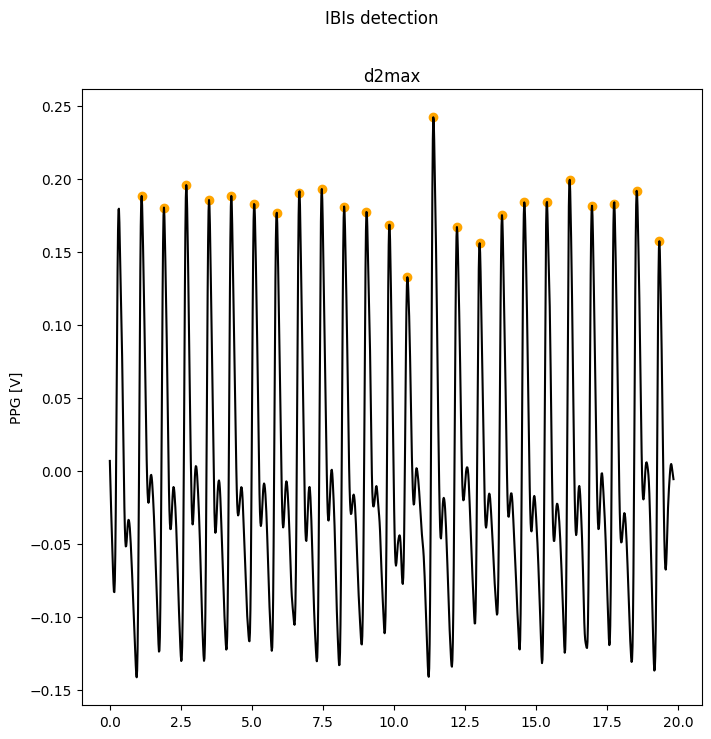

In [44]:
from matplotlib import pyplot as plt

fig, (ax1) = plt.subplots(1, 1,
                          sharex = False,
                          sharey = False,
                          figsize = (8,8))

fig.suptitle('IBIs detection') 

t = np.arange(0,len(ppg_filt)/fs,1.0/fs)

ax1.plot(t, ppg_filt, color = 'black')
ax1.scatter(t[0] + ibis/fs, ppg_filt[ibis], color = 'orange', marker = 'o')
ax1.set_ylabel('PPG [V]')
ax1.set_title(alg)

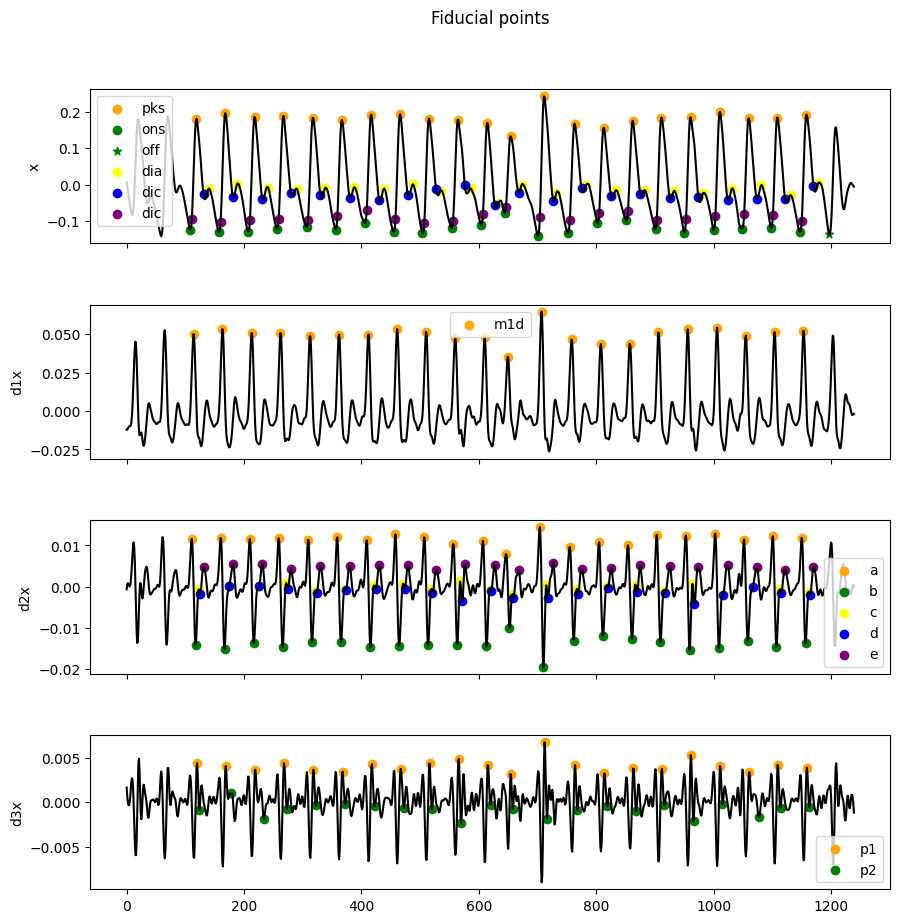

In [45]:
fidp = fiducial_points(ppg_filt, ibis, fs, vis = True)

In [46]:
from pprint import pprint
pprint(fidp)

{'a2d': array([ 111,  160,  210,  259,  309,  359,  409,  458,  507,  556,  607,
        646,  704,  755,  805,  854,  903,  953, 1003, 1052, 1101, 1150]),
 'b2d': array([ 118,  167,  217,  266,  316,  365,  415,  464,  514,  563,  613,
        652,  710,  762,  811,  861,  909,  959, 1009, 1058, 1107, 1157]),
 'bmag2d': array([-1.20904914, -1.27434528, -1.18617494, -1.25106435, -1.17975974,
       -1.12447263, -1.3061457 , -1.12799448, -1.18401298, -1.36005387,
       -1.30485677, -1.26691507, -1.34436591, -1.35381951, -1.10175006,
       -1.27191046, -1.06948183, -1.23981112, -1.16142864, -1.15492695,
       -1.18547511, -1.15976755]),
 'c2d': array([ 123,  175,  226,  272,  322,  372,  421,  471,  519,  568,  619,
        657,  715,  767,  818,  867,  915,  964, 1015, 1067, 1113, 1162]),
 'cmag2d': array([-0.05526044,  0.00494062,  0.00941491,  0.07592429, -0.08726073,
       -0.04180734,  0.02715034,  0.05699838, -0.04395489,  0.12223351,
       -0.06261118, -0.23006774,  0.0241488

In [47]:
print("Indices of dicrotic notches:")
print(fidp["dic"])

Indices of dicrotic notches:
[ 131  181  231  280  330  380  430  479  527  576  627  668  727  775
  825  875  925  974 1024 1074 1122 1170]


In [48]:
delta_t = np.zeros(len(fidp["dia"]))
for beat_no in range(len(fidp["dia"])):
    delta_t[beat_no] = (fidp["dia"][beat_no]-fidp["pks"][beat_no])/fs
print("Values of Delta T:")
print(delta_t)

Values of Delta T:
[0.33614791 0.32014086 0.36816199 0.36816199 0.33614791 0.33614791
 0.35215495 0.33614791 0.33614791 0.35215495 0.30413382 0.30413382
 0.33614791 0.32014086 0.33614791 0.33614791 0.35215495 0.33614791
 0.32014086 0.33614791 0.36816199 0.32014086]


In [49]:
agi = np.zeros(len(fidp["dia"]))
for beat_no in range(len(fidp["dia"])):
    agi[beat_no] = (fidp["bmag2d"][beat_no]-fidp["cmag2d"][beat_no]-fidp["dmag2d"][beat_no]-fidp["emag2d"][beat_no])/fs
print("Values of Aging Index:")
print(agi)

Values of Aging Index:
[-0.02245078 -0.02799722 -0.02702002 -0.02655158 -0.02260101 -0.02323702
 -0.02802546 -0.02488352 -0.02136646 -0.02658707 -0.02588554 -0.01917339
 -0.02529637 -0.02495559 -0.02405006 -0.02754274 -0.02019755 -0.02162308
 -0.02025896 -0.02483208 -0.02147618 -0.02077676]


# Create DATASET

### Beat detection setup

In [ ]:
Extracting BP values
Obtaining BPs from the ABP signal:
This has the advantage that no additional files are required, since all signals are stored in the same file. However, it does involve signal processing to obtain the values from the ABP signal.

We identify pulse onsets and peaks in the ABP signal to derive reference systolic, diastolic and mean BP values from the ABP signal.


In [50]:
# Segment for analysis


segment_names = ['83404654_0005', '82924339_0007', '84248019_0005', '82439920_0004', '82800131_0002', '84304393_0001', '89464742_0001', '88958796_0004', '88995377_0001', '85230771_0004', '86643930_0004', '81250824_0005', '87706224_0003', '83058614_0005', '82803505_0017', '88574629_0001', '87867111_0012', '84560969_0001', '87562386_0001', '88685937_0001', '86120311_0001', '89866183_0014', '89068160_0002', '86380383_0001', '85078610_0008', '87702634_0007', '84686667_0002', '84802706_0002', '81811182_0004', '84421559_0005', '88221516_0007', '80057524_0005', '84209926_0018', '83959636_0010', '89989722_0016', '89225487_0007', '84391267_0001', '80889556_0002', '85250558_0011', '84567505_0005', '85814172_0007', '88884866_0005', '80497954_0012', '80666640_0014', '82141753_0018', '86874920_0014', '84505262_0010', '86288257_0001', '89699401_0001', '88537698_0013', '83958172_0001']
segment_dirs = ['mimic4wdb/0.1.0/waves/p100/p10020306/83404654', 'mimic4wdb/0.1.0/waves/p101/p10126957/82924339', 'mimic4wdb/0.1.0/waves/p102/p10209410/84248019', 'mimic4wdb/0.1.0/waves/p109/p10952189/82439920', 'mimic4wdb/0.1.0/waves/p111/p11109975/82800131', 'mimic4wdb/0.1.0/waves/p113/p11392990/84304393', 'mimic4wdb/0.1.0/waves/p121/p12168037/89464742', 'mimic4wdb/0.1.0/waves/p121/p12173569/88958796', 'mimic4wdb/0.1.0/waves/p121/p12188288/88995377', 'mimic4wdb/0.1.0/waves/p128/p12872596/85230771', 'mimic4wdb/0.1.0/waves/p129/p12933208/86643930', 'mimic4wdb/0.1.0/waves/p130/p13016481/81250824', 'mimic4wdb/0.1.0/waves/p132/p13240081/87706224', 'mimic4wdb/0.1.0/waves/p136/p13624686/83058614', 'mimic4wdb/0.1.0/waves/p137/p13791821/82803505', 'mimic4wdb/0.1.0/waves/p141/p14191565/88574629', 'mimic4wdb/0.1.0/waves/p142/p14285792/87867111', 'mimic4wdb/0.1.0/waves/p143/p14356077/84560969', 'mimic4wdb/0.1.0/waves/p143/p14363499/87562386', 'mimic4wdb/0.1.0/waves/p146/p14695840/88685937', 'mimic4wdb/0.1.0/waves/p149/p14931547/86120311', 'mimic4wdb/0.1.0/waves/p151/p15174162/89866183', 'mimic4wdb/0.1.0/waves/p153/p15312343/89068160', 'mimic4wdb/0.1.0/waves/p153/p15342703/86380383', 'mimic4wdb/0.1.0/waves/p155/p15552902/85078610', 'mimic4wdb/0.1.0/waves/p156/p15649186/87702634', 'mimic4wdb/0.1.0/waves/p158/p15857793/84686667', 'mimic4wdb/0.1.0/waves/p158/p15865327/84802706', 'mimic4wdb/0.1.0/waves/p158/p15896656/81811182', 'mimic4wdb/0.1.0/waves/p159/p15920699/84421559', 'mimic4wdb/0.1.0/waves/p160/p16034243/88221516', 'mimic4wdb/0.1.0/waves/p165/p16566444/80057524', 'mimic4wdb/0.1.0/waves/p166/p16644640/84209926', 'mimic4wdb/0.1.0/waves/p167/p16709726/83959636', 'mimic4wdb/0.1.0/waves/p167/p16715341/89989722', 'mimic4wdb/0.1.0/waves/p168/p16818396/89225487', 'mimic4wdb/0.1.0/waves/p170/p17032851/84391267', 'mimic4wdb/0.1.0/waves/p172/p17229504/80889556', 'mimic4wdb/0.1.0/waves/p173/p17301721/85250558', 'mimic4wdb/0.1.0/waves/p173/p17325001/84567505', 'mimic4wdb/0.1.0/waves/p174/p17490822/85814172', 'mimic4wdb/0.1.0/waves/p177/p17738824/88884866', 'mimic4wdb/0.1.0/waves/p177/p17744715/80497954', 'mimic4wdb/0.1.0/waves/p179/p17957832/80666640', 'mimic4wdb/0.1.0/waves/p181/p18109577/82141753', 'mimic4wdb/0.1.0/waves/p183/p18324626/86874920', 'mimic4wdb/0.1.0/waves/p187/p18742074/84505262', 'mimic4wdb/0.1.0/waves/p188/p18824975/86288257', 'mimic4wdb/0.1.0/waves/p191/p19126489/89699401', 'mimic4wdb/0.1.0/waves/p193/p19313794/88537698', 'mimic4wdb/0.1.0/waves/p196/p19619764/83958172']



Metadata loaded from segment: 83404654_0005
20 seconds of data extracted from: 83404654_0005
Extracted the ABP signal from column 3 of the matrix of waveform data at 62.5 Hz.
Extracted the PPG signal from column 4 of the matrix of waveform data at 62.5 Hz.
Detected 18 beats in the PPG signal using the D2max algorithm
Detected 18 beats in the PPG signal using the Upslopes algorithm
Detected 12 beats in the PPG signal using the Delineator algorithm
Metadata loaded from segment: 82924339_0007
20 seconds of data extracted from: 82924339_0007
Extracted the ABP signal from column 3 of the matrix of waveform data at 62.5 Hz.
Extracted the PPG signal from column 4 of the matrix of waveform data at 62.5 Hz.
Detected 17 beats in the PPG signal using the D2max algorithm
Detected 15 beats in the PPG signal using the Upslopes algorithm
Detected 14 beats in the PPG signal using the Delineator algorithm
Metadata loaded from segment: 84248019_0005
20 seconds of data extracted from: 84248019_0005
Extra

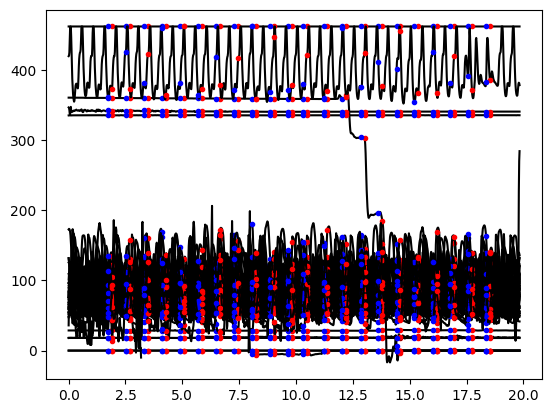

In [51]:
for rel_segment_no in range(51):
    rel_segment_name = segment_names[rel_segment_no]
    rel_segment_dir = segment_dirs[rel_segment_no]
    # time since the start of the segment at which to begin extracting data
    start_seconds = 100
    no_seconds_to_load = 20
    
    segment_metadata = wfdb.rdheader(record_name=rel_segment_name, pn_dir=rel_segment_dir) 
    print(f"Metadata loaded from segment: {rel_segment_name}")

    fs = round(segment_metadata.fs)
    sampfrom = fs*start_seconds
    sampto = fs*(start_seconds+no_seconds_to_load)

    segment_data = wfdb.rdrecord(record_name=rel_segment_name,
                             sampfrom=sampfrom,
                             sampto=sampto,
                             pn_dir=rel_segment_dir)

    print(f"{no_seconds_to_load} seconds of data extracted from: {rel_segment_name}")
    abp_col = []
    ppg_col = []

    for sig_no in range(0,len(segment_data.sig_name)):
        if "ABP" in segment_data.sig_name[sig_no]:
            abp_col = sig_no
        if "Pleth" in segment_data.sig_name[sig_no]:
            ppg_col = sig_no

    abp = segment_data.p_signal[:,abp_col]
    ppg = segment_data.p_signal[:,ppg_col]
    fs = segment_data.fs

    print(f"Extracted the ABP signal from column {abp_col} of the matrix of waveform data at {fs:.1f} Hz.")
    print(f"Extracted the PPG signal from column {ppg_col} of the matrix of waveform data at {fs:.1f} Hz.")
    
    # package
    import scipy.signal as sp

    # filter cut-offs
    lpf_cutoff = 0.7 # Hz
    hpf_cutoff = 10 # Hz

    # create filter
    sos_filter = sp.butter(10, [lpf_cutoff, hpf_cutoff],
                       btype = 'bp',
                       analog = False,
                       output = 'sos',
                       fs = fs)

    # filter PPG
    ppg_filt = sp.sosfiltfilt(sos_filter, ppg)

    # Filter ABP
    abp_filt = sp.sosfiltfilt(sos_filter, abp)
    
    
    

    temp_fs = 125

    ppg_ibis_d2max = pulse_detect(ppg_filt, temp_fs, 5, 'd2max')
    #if ppg_ibis_d2max:
    print(f"Detected {len(ppg_ibis_d2max)} beats in the PPG signal using the {'D2max'} algorithm")

    ppg_ibis_upslopes = pulse_detect(ppg_filt, temp_fs, 5,'upslopes')
    #if ppg_ibis_upslopes:
    print(f"Detected {len(ppg_ibis_upslopes)} beats in the PPG signal using the {'Upslopes'} algorithm")

    ppg_ibis_delineator = pulse_detect(ppg_filt, temp_fs, 5, 'delineator')
    #if ppg_ibis_delineator:
    print(f"Detected {len(ppg_ibis_delineator)} beats in the PPG signal using the {'Delineator'} algorithm")
   
    Heart_Rate = 3*len(ppg_ibis_upslopes)
    

    
    temp_fs = 125
    alg = 'd2max'

    
    pks = fidp["pks"]
    ons = fidp["ons"]
    t = np.arange(0,(len(abp)/fs),1.0/fs)
    plt.plot(t, abp, color = 'black')
    plt.plot(t[pks], abp[pks], ".", color = 'red')
    plt.plot(t[ons], abp[ons], ".", color = 'blue')
    
    
    pks = fidp["pks"]
    ons = fidp["ons"]
    t = np.arange(0,(len(abp)/fs),1.0/fs)

    sbp = np.median(abp[fidp['pks']])
    dbp = np.median(abp[fidp['ons']])
    
    df.at[rel_segment_no, 'Heart_Rate'] = Heart_Rate
    df.at[rel_segment_no, 'Systolic_blood_pressure(SBP)'] = sbp

In [52]:
df

,Heart_Rate,Systolic_blood_pressure(SBP)
0,54,28.5625
1,45,52.5
2,69,66.8125
3,90,73.78125
4,87,86.8125
5,78,43.125
6,114,70.40625
7,84,62.84375
8,90,93.875
9,120,59.6875


In [53]:
df = df[df['Systolic_blood_pressure(SBP)']!= 0.0]

In [55]:
# using apply function to create a new column

df['Shock_index'] = df['Heart_Rate']/df['Systolic_blood_pressure(SBP)']

# Print the DataFrame after addition
# of new column
print(df)

   Heart_Rate Systolic_blood_pressure(SBP) Shock_index
0          54                      28.5625    1.890591
1          45                         52.5    0.857143
2          69                      66.8125    1.032741
3          90                     73.78125    1.219822
4          87                      86.8125     1.00216
5          78                       43.125    1.808696
6         114                     70.40625    1.619174
7          84                     62.84375    1.336648
8          90                       93.875    0.958722
9         120                      59.6875    2.010471
10        123                     18.03125     6.82149
11         66                      90.6875    0.727774
12         72                      52.1875    1.379641
13         78                      55.3125    1.410169
14         69                     96.28125     0.71665
15         84                     94.34375    0.890361
16        114                      57.1875    1.993443
17        

C:\Users\rikin\AppData\Local\Temp\ipykernel_25764\1019630127.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Shock_index'] = df['Heart_Rate']/df['Systolic_blood_pressure(SBP)']


In [56]:
df = df[df['Systolic_blood_pressure(SBP)']!= 0.0]
df = df.reset_index()

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   index                         48 non-null     int64 
 1   Heart_Rate                    48 non-null     object
 2   Systolic_blood_pressure(SBP)  48 non-null     object
 3   Shock_index                   48 non-null     object
dtypes: int64(1), object(3)
memory usage: 1.6+ KB


In [58]:
 df['Shock_index'].astype(float)

0     1.890591
1     0.857143
2     1.032741
3     1.219822
4     1.002160
5     1.808696
6     1.619174
7     1.336648
8     0.958722
9     2.010471
10    6.821490
11    0.727774
12    1.379641
13    1.410169
14    0.716650
15    0.890361
16    1.993443
17    1.087705
18    1.968984
19    0.568257
20    1.156627
21    0.275886
22    1.405405
23    1.210266
24    0.108597
25    0.996195
26    1.074903
27    0.887902
28    0.698787
29    0.838269
30    3.783251
31    1.079410
32    0.872216
33    1.193313
34    0.801603
35    1.151488
36    1.651376
37    0.955224
38    0.223630
39    0.149371
40    3.160494
41    0.293869
42    1.445002
43    0.685225
44    1.242857
45    2.298746
46    0.202569
47    0.635762
Name: Shock_index, dtype: float64

In [59]:
y = [a if np.isnan(a) else 1 if a>1.0 else 0 for a in df.Shock_index]
df['critically ill'] = y

In [60]:
df

,index,Heart_Rate,Systolic_blood_pressure(SBP),Shock_index,critically ill
0,0,54,28.5625,1.890591,1
1,1,45,52.5,0.857143,0
2,2,69,66.8125,1.032741,1
3,3,90,73.78125,1.219822,1
4,4,87,86.8125,1.00216,1
5,5,78,43.125,1.808696,1
6,6,114,70.40625,1.619174,1
7,7,84,62.84375,1.336648,1
8,8,90,93.875,0.958722,0
9,9,120,59.6875,2.010471,1


In [63]:
# saving the dataframe
df.to_csv('Shock_index.csv')

## Credits

1. https://wfdb.io/mimic_wfdb_tutorials/intro.html

2. https://physionet.org/content/mimic4wdb/0.1.0/

